# 2017 Training Performance Analysis: Session Delivery Overview

## Introduction

This document gives an overview of the training performance in 2017. It explains the number of sessions delivered during this period and helps to understand the demand for each course. The analysis supports planning for future training programs and helps identify areas with higher participation or new needs. This supports the goal to improve training effectiveness and use resources wisely.

## Objectives

The main goals of this analysis are to:

* Show the total number of sessions delivered for each course in 2017.
* Identify trends in the frequency of sessions across course groups.
* Highlight areas of growth or decline to guide future planning.
* Support decisions about course scheduling, instructor use, and resource investment.
* Show the count of cohorts delivered in the year 2017 for each course where data is available.

Success will be measured by clear and accurate insights that support planning for the next training cycle.

## Scope

The analysis covers all training sessions delivered between January 2017 and December 2017. This includes course titles, number of sessions, cohort count per course, and participation numbers where available. The focus is on measurable delivery data. It does not include feedback or performance results. All data is taken from internal training records and checked for accuracy.

## Methodology

The analysis follows these steps:

1. Collect and confirm session data from the 2017 records.
2. Group courses by category and session frequency.
3. Review cohort counts to understand training volume per group.
4. Use filters to find changes in demand.
5. Present results in tables and charts for easy review.

This method ensures complete and reliable data.

## Expected Outcomes

The expected results include:

* A clear summary of session delivery volume for each course.
* A count of cohorts delivered per course in 2017.
* Insights into trends in training demand.
* Recommendations that support planning for future training.

The results will support the next year training calendar and ensure good use of resources while meeting learner needs.

In [1]:
import pandas as pd
import warnings

# Suppress "serial value outside limits" warnings
with warnings.catch_warnings(record=True):
    warnings.simplefilter("ignore")

    # Read Excel without date parsing
    data = pd.read_excel(
        "/kaggle/input/trainingdata/TKI-Course-repository.xlsx",
        engine="openpyxl",
        parse_dates=False,  # ✅ correct parameter
        dtype=str            # ✅ read everything as text to avoid Excel date conversion
    )

# Check Data Structure
print("Data Structure:")
print(data.info())

Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42450 entries, 0 to 42449
Data columns (total 53 columns):
 #   Column                                                                                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                          --------------  ----- 
 0   https://www.linkedin.com/profile/view?id=32701032&authType=NAME_SEARCH&authToken=xxDe&locale=en_US&srchid=1285069551424960135798&srchindex=1&srchtotal=1&trk=vsrp_people_res_name&trkInfo=VSRPsearchId%3A1285069551424960135798%2CVSRPtargetId%3A32701032%2CVSRPcmpt%3Aprimary

### **Data Preparation**

This step creates a structured dataset focused on analyzing course sessions delivered between **2017**. The process involves selecting relevant fields, standardizing date formats, and filtering by year to ensure clean and consistent data for analysis.

- **Column Selection:**  
  From the original dataset, nine key columns are retained to capture essential course and scheduling details:  
  **Organizer**, **Facilitator**, **Course Title**, **Course Structure**, **Method**, **Start Date**, **End Date**, **Course City**, and **Course Country**.  
  These columns provide complete coverage of delivery, timing, and location aspects, removing unrelated fields to improve efficiency and clarity.

- **Date Standardization:**  
  A robust multi-pass date parser converts all date values into a consistent format.  
  It handles:
  - Excel serial numbers (e.g., `45250` → valid date).  
  - Day-first formats (`28.09.2025`, `28/09/2025`, `28-09-2025`).  
  - Year-first ISO formats (`2025-09-28`, `2025/09/28`).  
  - Month-first fallbacks (`09/28/2025`).  
  The cleaned results are stored in two new columns — **`Start date std`** and **`End date std`**.

- **Filtering by Year:**  
  The dataset is filtered to include only sessions where either the start or end date falls within **2017**.  
  Any sessions with dates from **2017** are explicitly removed to keep the analysis focused on recent delivery activity.

- **Verification Output:**  
  The script prints the total number of valid rows and displays the first and last 20 records to confirm accuracy after filtering and parsing.

In [2]:
# Use the existing dataframe named `data`
# Keep ONLY these columns
selected_columns = [
    'Organizer',
    'Facilitator',
    'Course title',
    'Course structure',
    'Method',
    'Start date',
    'End date',
    'Course city',
    'Course country',
]

# Create the working dataset named `course`
course = data[selected_columns].copy()

# ---------- Robust multi-pass date parser (handles '.', '/', '-' and Excel serials) ----------
def parse_dates(s: pd.Series) -> pd.Series:
    # Clean once
    s = s.astype('string').str.strip()

    # 1) Excel serials first (accept '45250' and '45250.0'; avoid short numbers like '2025')
    ser_mask = s.str.fullmatch(r'\d{5,}(?:\.0+)?')
    ser = pd.to_numeric(s.where(ser_mask).str.replace(r'\.0+$', '', regex=True), errors='coerce')
    out = pd.to_datetime(ser, unit='d', origin='1899-12-30', errors='coerce')

    # 2) Day-first strings: '28.09.2025', '28/9/2025', '28-09-2025'
    m = out.isna()
    out[m] = pd.to_datetime(s[m], dayfirst=True, errors='coerce', cache=True)

    # 3) Year-first (ISO etc.): '2025-09-28', '2025/09/28'
    m = out.isna()
    out[m] = pd.to_datetime(s[m], yearfirst=True, errors='coerce', cache=True)

    # 4) Last-chance month-first: '09/28/2025'
    m = out.isna()
    out[m] = pd.to_datetime(s[m], errors='coerce', cache=True)

    return out
# --------------------------------------------------------------------------------------------

# Create standardized datetime columns
course['Start date std'] = parse_dates(course['Start date'])
course['End date std']   = parse_dates(course['End date'])

# Keep ONLY rows where Start date std OR End date std is in 2023/2024/2025
valid_years = {2017}
mask_years = (
    course['Start date std'].dt.year.isin(valid_years) |
    course['End date std'].dt.year.isin(valid_years)
)
course = course[mask_years].reset_index(drop=True)
# (optional) Explicitly exclude any row where Start/End std is in 2016
# course = course[~(course['Start date std'].dt.year.eq(2016) | course['End date std'].dt.year.eq(2016))].reset_index(drop=True)

# (Optional) quick look
print("Filtered rows (years 2017 in Start/End std):", len(course))
display(course.head(20))
display(course.tail(20))

Filtered rows (years 2017 in Start/End std): 1099


/tmp/ipykernel_13/3052150436.py:30: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  out[m] = pd.to_datetime(s[m], dayfirst=True, errors='coerce', cache=True)
/tmp/ipykernel_13/3052150436.py:34: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  out[m] = pd.to_datetime(s[m], yearfirst=True, errors='coerce', cache=True)
/tmp/ipykernel_13/3052150436.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  out[m] = pd.to_datetime(s[m], errors='coerce', cache=True)
/tmp/ipykernel_13/3052150436.py:30: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence

,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Start date std,End date std
0,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT
1,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT
2,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT
3,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT
4,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT
5,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT
6,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT
7,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-20 00:00:00,NaN,Hanoi,Vietnam,2017-01-20,NaT
8,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-20 00:00:00,NaN,Hanoi,Vietnam,2017-01-20,NaT
9,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-20 00:00:00,NaN,Hanoi,Vietnam,2017-01-20,NaT


,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Start date std,End date std
1079,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29
1080,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29
1081,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29
1082,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29
1083,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29
1084,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29
1085,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29
1086,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29
1087,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29
1088,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29


### Duplicate Check and Participant Count

In this step, we define one session and count how many participant records belong to it. This helps us measure session volume without changing the source data.

#### Session Rule
A session is the unique combination of four columns: **Facilitator**, **Course Title**, **Method**, **Start Date**, and **End Date**.

#### What We Do
1. Find duplicate rows based on the four columns above.  
2. Add a new column **Participants Count**, which stores the size of each group defined by the four columns.  
3. For any row with no duplicate, set **Participants Count** to 1. This column has no missing values.  
4. Produce three checks for quick validation:  
   - **Total rows**: the number of records in the filtered dataset.  
   - **Total participants count**: the sum of *Participants Count* across unique sessions. This equals the number of rows.  
   - **Total sessions**: the number of unique combinations of the four key columns.  
5. Show a short preview so we can confirm the result.

#### Assumptions and Guardrails
- We do not change the data type of any existing column.  
- We only add the **Participants Count** column.  
- All four grouping columns must be present and readable in the dataset.

In [3]:
# Define the session key
key_cols = ['Facilitator', 'Course title', 'Start date', 'End date']

# Count rows per unique session, aligned back to each row
group_sizes = course.groupby(key_cols, dropna=False).size()
course['Participants count'] = course[key_cols].merge(
    group_sizes.rename('Participants count').reset_index(),
    on=key_cols,
    how='left'
)['Participants count']

# Safety check: ensure no missing values in the new column, default to 1 if any appear
course['Participants count'] = course['Participants count'].fillna(1).astype(int)

# Summary numbers
total_rows = len(course)
total_sessions = group_sizes.shape[0]
total_participants = int(group_sizes.sum())  # equals total_rows by construction

# Print summaries
print("Total rows:", total_rows)
print("Total participants count:", total_participants)
print("Total sessions:", total_sessions)

# Preview
print("\nPreview:")
display(course.head(20))   # top 20
display(course.tail(20))   # bottom 20

Total rows: 1099
Total participants count: 1099
Total sessions: 97

Preview:


,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Start date std,End date std,Participants count
0,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT,7
1,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT,7
2,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT,7
3,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT,7
4,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT,7
5,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT,7
6,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT,7
7,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-20 00:00:00,NaN,Hanoi,Vietnam,2017-01-20,NaT,6
8,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-20 00:00:00,NaN,Hanoi,Vietnam,2017-01-20,NaT,6
9,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-20 00:00:00,NaN,Hanoi,Vietnam,2017-01-20,NaT,6


,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Start date std,End date std,Participants count
1079,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29,20
1080,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29,20
1081,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29,20
1082,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29,20
1083,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29,20
1084,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29,20
1085,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29,20
1086,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29,20
1087,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29,20
1088,First Priority,Aurel Brudan,C-KPI,Open,Face to face,2017-12-27 00:00:00,2017-12-29 00:00:00,Shanghai,China,2017-12-27,2017-12-29,20


### Delete wrong room record due to incorrect year

In [4]:
# Define the specific rows to remove
rows_to_delete = []

# Drop these rows from the dataframe
# errors='ignore' prevents the code from crashing if you run it twice
course.drop(rows_to_delete, axis=0, inplace=True, errors='ignore')

# Optional: Reset the index so the numbers start from 0 again (cleaner look)
course.reset_index(drop=True, inplace=True)

print(f"Successfully deleted rows: {rows_to_delete}")
print("Here is the new top of your list:")
display(course.head())

Successfully deleted rows: []
Here is the new top of your list:


,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Start date std,End date std,Participants count
0,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT,7
1,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT,7
2,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT,7
3,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT,7
4,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT,7


### Remove duplicates, keep one row per session

We will drop duplicate rows using the session keys, Facilitator, Course title, Start date, End date. We keep the first row of each session. The Participants count column already stores the group size, so the kept row holds the correct count. No other column types change.

In [5]:
# Keys that define one session
key_cols = ['Facilitator', 'Course title', 'Start date', 'End date']

# Remove duplicates, keep the first row per session
course_dedup = course.drop_duplicates(subset=key_cols, keep='first').copy()

# Quick checks
print("Rows before:", len(course))
print("Rows after :", len(course_dedup))
print("Rows removed:", len(course) - len(course_dedup))

print("\nPreview after dedupe:")
display(course_dedup.head())

Rows before: 1099
Rows after : 97
Rows removed: 1002

Preview after dedupe:


,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Start date std,End date std,Participants count
0,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT,7
7,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-20 00:00:00,NaN,Hanoi,Vietnam,2017-01-20,NaT,6
13,TKI,Ahmed Gadelhak,C-KPI,In-house,Face to face,2017-02-14 00:00:00,2017-02-16 00:00:00,Riyadh,Saudi Arabia,2017-02-14,2017-02-16,10
23,TKI,Adrian Brudan,C-KPI,Open,Face to face,2017-02-19 00:00:00,2017-02-21 00:00:00,Dubai,United Arab Emirates,2017-02-19,2017-02-21,3
26,TKI,Adrian Brudan,C-KPIPP,Open,Face to face,2017-02-19 00:00:00,2017-02-23 00:00:00,Dubai,United Arab Emirates,2017-02-19,2017-02-23,7


In [6]:
# Check if there are still duplicates after the cleaning process
remaining_duplicates = course_dedup[course_dedup.duplicated(subset=['Facilitator', 'Course title', 'Start date', 'End date'], keep=False)]

# Display the results
if len(remaining_duplicates) == 0:
    print("✅ No duplicates remain. The data is clean.")
else:
    print(f"⚠️ There are still {len(remaining_duplicates)} duplicates remaining.")
    display(remaining_duplicates.head())

✅ No duplicates remain. The data is clean.


In [7]:
print(course_dedup.info())

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 1079
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Organizer           97 non-null     object        
 1   Facilitator         97 non-null     object        
 2   Course title        97 non-null     object        
 3   Course structure    97 non-null     object        
 4   Method              97 non-null     object        
 5   Start date          96 non-null     object        
 6   End date            88 non-null     object        
 7   Course city         97 non-null     object        
 8   Course country      97 non-null     object        
 9   Start date std      96 non-null     datetime64[ns]
 10  End date std        88 non-null     datetime64[ns]
 11  Participants count  97 non-null     int64         
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 9.9+ KB
None


In [8]:
# Configure the table to scroll
def table(df, height=400):
    display(df.style.set_table_attributes(f'style="display:inline-block;overflow:auto;height:{height}px;width:auto;"').set_table_styles([{
        'selector': '',
        'props': [('border-collapse', 'collapse'),
                  ('margin', '0px')]}]))

# Display the table
table(course_dedup)

,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Start date std,End date std,Participants count
0,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,nan,Hanoi,Vietnam,2017-01-19 00:00:00,NaT,7
7,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-20 00:00:00,nan,Hanoi,Vietnam,2017-01-20 00:00:00,NaT,6
13,TKI,Ahmed Gadelhak,C-KPI,In-house,Face to face,2017-02-14 00:00:00,2017-02-16 00:00:00,Riyadh,Saudi Arabia,2017-02-14 00:00:00,2017-02-16 00:00:00,10
23,TKI,Adrian Brudan,C-KPI,Open,Face to face,2017-02-19 00:00:00,2017-02-21 00:00:00,Dubai,United Arab Emirates,2017-02-19 00:00:00,2017-02-21 00:00:00,3
26,TKI,Adrian Brudan,C-KPIPP,Open,Face to face,2017-02-19 00:00:00,2017-02-23 00:00:00,Dubai,United Arab Emirates,2017-02-19 00:00:00,2017-02-23 00:00:00,7
33,TKI,Adrian Otoiu,DA-M,In-house,Face to face,2017-02-26 00:00:00,2017-02-27 00:00:00,Dubai,United Arab Emirates,2017-02-26 00:00:00,2017-02-27 00:00:00,25
58,TKI,Mihai Toma,KPI-E,In-house,Face to face,2017-02-26 00:00:00,nan,Riyadh,Saudi Arabia,2017-02-26 00:00:00,NaT,21
79,TKI,Mihai Toma,KPI-E,In-house,Face to face,2017-02-27 00:00:00,nan,Riyadh,Saudi Arabia,2017-02-27 00:00:00,NaT,10
89,TKI,Mihai Toma,KPI-E,In-house,Face to face,2017-02-28 00:00:00,nan,Riyadh,Saudi Arabia,2017-02-28 00:00:00,NaT,19
108,TKI,Mihai Toma,KPI-E,In-house,Face to face,2017-03-01 00:00:00,nan,Riyadh,Saudi Arabia,2017-03-01 00:00:00,NaT,22


In [9]:
# Export cleaned data to Excel file
output_path = '/kaggle/working/Course-Season-2017-Participants.xlsx'
course_dedup.to_excel(output_path, index=False)

print(f"✅ Data successfully exported to: {output_path}")

✅ Data successfully exported to: /kaggle/working/Course-Season-2017-Participants.xlsx


### Duration & Quality Checks

**What this step does (using `course_dedup`):**

1. **Duration math (inclusive):**
   Creates `Duration (days)` as
   `End date std − Start date std + 1`,
   so a one-day course counts as **1** (not 0).

2. **Targeted flags (`suspicious_mask`):**
   Marks rows for review when:

   * `Duration (days) < 1` → end before start (likely parse/data issue) and same date, or
   * `Duration (days) > 15` → unusually long course.

3. **Clear outputs for review:**

   * **Rows with suspicious durations:** shows key columns plus `Start date std`, `End date std`, and `Duration (days)`.
   * **Rows with unparsed dates (NaT):** any row where either `Start date std` or `End date std` is missing.

4. **Summary counters:**
   Prints total rows in `course_dedup`, count of **NaT** rows, and count of **suspicious** rows.

In [10]:
# ---- NEXT STEP: duration math, flags, and review tables (use course_dedup) ----
# Assumes `course_dedup` already has parsed columns: 'Start date std' and 'End date std'

# 1) Duration (inclusive) — a one-day course = 1 day
course_dedup['Duration (days)'] = (
    course_dedup['End date std'] - course_dedup['Start date std']
).dt.days + 1

# 2) Targeted flags
#    - Duration < 2  : end before start (likely parsing/data error) and same date check
#    - Duration > 15 : unusually long, needs review
suspicious_mask = (course_dedup['Duration (days)'] < 2) | (course_dedup['Duration (days)'] > 15)

# 3) Clear outputs
#    a) Rows with unparsed dates (either std date is NaT)
nat_mask = course_dedup['Start date std'].isna() | course_dedup['End date std'].isna()
nat_table = course_dedup.loc[nat_mask, [
    'Organizer', 'Facilitator', 'Course title', 'Course structure', 'Method', 'Participants count',
    'Start date', 'End date', 'Course city', 'Course country'
]]

#    b) Rows with suspicious durations
suspicious_table = course_dedup.loc[suspicious_mask, [
    'Organizer', 'Facilitator', 'Course title', 'Course structure', 'Method', 'Participants count',
    'Start date', 'End date', 'Start date std', 'End date std',
    'Duration (days)', 'Course city', 'Course country'
]]

# 4) Summary + displays
rows_total = len(course_dedup)
nat_count = nat_mask.sum()
suspicious_count = suspicious_mask.sum()

print(f"Total rows (dedup): {rows_total}")
print(f"Rows with unparsed dates (NaT): {nat_count}")
print(f"Rows with suspicious durations (<2 or >15 days): {suspicious_count}\n")

print(" ROWS WITH SUSPICIOUS DURATION ")
display(suspicious_table)

print("\n ROWS THAT FAILED TO PARSE (NaT) ")
display(nat_table)

Total rows (dedup): 97
Rows with unparsed dates (NaT): 10
Rows with suspicious durations (<2 or >15 days): 2

 ROWS WITH SUSPICIOUS DURATION 


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,Organizer,Facilitator,Course title,Course structure,Method,Participants count,Start date,End date,Start date std,End date std,Duration (days),Course city,Course country
136,TKI,Raluca Vintila,KPI-M,In-house,Face to face,9,2017-03-10 00:00:00,2017-03-10 00:00:00,2017-03-10,2017-03-10,1.0,Lahore,Pakistan
901,TKI,Mihai Toma,KPI-E,In-house,Face to face,26,2017-11-23 00:00:00,2017-11-23 00:00:00,2017-11-23,2017-11-23,1.0,Riyadh,Saudi Arabia



 ROWS THAT FAILED TO PARSE (NaT) 


,Organizer,Facilitator,Course title,Course structure,Method,Participants count,Start date,End date,Course city,Course country
0,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,7,2017-01-19 00:00:00,NaN,Hanoi,Vietnam
7,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,6,2017-01-20 00:00:00,NaN,Hanoi,Vietnam
58,TKI,Mihai Toma,KPI-E,In-house,Face to face,21,2017-02-26 00:00:00,NaN,Riyadh,Saudi Arabia
79,TKI,Mihai Toma,KPI-E,In-house,Face to face,10,2017-02-27 00:00:00,NaN,Riyadh,Saudi Arabia
89,TKI,Mihai Toma,KPI-E,In-house,Face to face,19,2017-02-28 00:00:00,NaN,Riyadh,Saudi Arabia
108,TKI,Mihai Toma,KPI-E,In-house,Face to face,22,2017-03-01 00:00:00,NaN,Riyadh,Saudi Arabia
130,TKI,Teodora Gorski,KPI-E,In-house,Face to face,6,2017-03-17 00:00:00,NaN,Dubai,United Arab Emirates
169,TKI,Cristina Tarata,KPI-E,In-house,Face to face,10,2017-03-21 00:00:00,NaN,London,United Kingdom
357,TKI,Mihai Toma,KPI-E,Open,Face to face,9,2017-05-17 00:00:00,NaN,Riyadh,Saudi Arabia
850,TKI,Mihai Toma,C-BSC,In-house,Face to face,24,NaN,2017-11-21 00:00:00,Riyadh,Saudi Arabia


### **Data Cleaning & Validation Plan**

#### **1. Identify Ambiguity**  
For each date in the `suspicious_table`, check if both the **day** and **month** fall between 1 and 12.  
This helps detect potentially ambiguous dates that may have been misinterpreted due to mixed formats (e.g., `03/07` could mean **March 7** or **July 3**).

#### **2. Create a Flag**  
Add a new column that **flags rows with ambiguous dates**.  
This makes it easy to isolate and review problematic entries before applying corrections.

#### **3. Swap Day and Month**  
For all **flagged dates**, swap the **day** and **month** values.  
This corrects possible day/month parsing errors caused by differing date conventions (e.g., **US vs. EU** formats).

#### **4. Recalculate Duration**  
After correcting dates, **recalculate the duration** (e.g., between `start_date` and `end_date`) to ensure logical and consistent time intervals.

#### **5. Show Before & After**  
Produce a **comparison table** displaying both versions:
- Original (ambiguous) data  
- Corrected (cleaned) data  

This visual check verifies the accuracy of the cleaning process before finalizing the dataset.

In [11]:
# Create a copy to work on, preserving the original table
resolved_table = suspicious_table.copy()

print(" Original Suspicious Table ")
print("Notice 'Course B' has a negative duration, indicating a parsing error.")
display(suspicious_table)


# 1. Define a function to check if a date is ambiguous (day and month are 1-12)
def is_date_ambiguous(dt):
    """Returns True if a datetime object's day and month are both between 1 and 12."""
    if pd.isna(dt):
        return False
    return 1 <= dt.day <= 12 and 1 <= dt.month <= 12

# 2. Apply this function to create boolean flags for start and end dates
resolved_table['start_is_ambiguous'] = resolved_table['Start date std'].apply(is_date_ambiguous)
resolved_table['end_is_ambiguous'] = resolved_table['End date std'].apply(is_date_ambiguous)

# Create a single flag for the entire row
resolved_table['Ambiguous Flag'] = resolved_table['start_is_ambiguous'] | resolved_table['end_is_ambiguous']


# 3. Define a function to swap the day and month of a datetime object
def swap_day_month(dt):
    """Returns a new datetime object with the day and month swapped."""
    if pd.isna(dt):
        return pd.NaT
    # Create a new Timestamp to avoid errors with non-existent dates (e.g., 31st of Feb)
    return pd.Timestamp(year=dt.year, month=dt.day, day=dt.month)


# 4. Create new 'resolved' columns
# Initialize them with the original dates
resolved_table['Start date resolved'] = resolved_table['Start date std']
resolved_table['End date resolved'] = resolved_table['End date std']

# Conditionally apply the swap only where the dates were flagged as ambiguous
resolved_table.loc[resolved_table['start_is_ambiguous'], 'Start date resolved'] = resolved_table.loc[resolved_table['start_is_ambiguous'], 'Start date std'].apply(swap_day_month)
resolved_table.loc[resolved_table['end_is_ambiguous'], 'End date resolved'] = resolved_table.loc[resolved_table['end_is_ambiguous'], 'End date std'].apply(swap_day_month)


# 5. Recalculate the duration based on the new 'resolved' dates
new_duration = (resolved_table['End date resolved'] - resolved_table['Start date resolved'])
resolved_table['Duration resolved (days)'] = new_duration.dt.days + 1


# 6. Create the final "Before and After" comparison table for easy review
comparison_view = resolved_table[[
    'Course title',
    'Start date std',
    'End date std',
    'Duration (days)',
    'Ambiguous Flag',
    'Start date resolved',
    'End date resolved',
    'Duration resolved (days)'
]].copy()

# Format dates for clearer display
for col in ['Start date std', 'End date std', 'Start date resolved', 'End date resolved']:
    comparison_view[col] = comparison_view[col].dt.strftime('%Y-%m-%d')


print("\n\n Corrected Dates and Durations (Comparison View) ")
print("The 'resolved' columns show the corrected dates and logical durations.")
display(comparison_view)

 Original Suspicious Table 
Notice 'Course B' has a negative duration, indicating a parsing error.


,Organizer,Facilitator,Course title,Course structure,Method,Participants count,Start date,End date,Start date std,End date std,Duration (days),Course city,Course country
136,TKI,Raluca Vintila,KPI-M,In-house,Face to face,9,2017-03-10 00:00:00,2017-03-10 00:00:00,2017-03-10,2017-03-10,1.0,Lahore,Pakistan
901,TKI,Mihai Toma,KPI-E,In-house,Face to face,26,2017-11-23 00:00:00,2017-11-23 00:00:00,2017-11-23,2017-11-23,1.0,Riyadh,Saudi Arabia




 Corrected Dates and Durations (Comparison View) 
The 'resolved' columns show the corrected dates and logical durations.


,Course title,Start date std,End date std,Duration (days),Ambiguous Flag,Start date resolved,End date resolved,Duration resolved (days)
136,KPI-M,2017-03-10,2017-03-10,1.0,True,2017-10-03,2017-10-03,1
901,KPI-E,2017-11-23,2017-11-23,1.0,False,2017-11-23,2017-11-23,1


### **Course Duration Quality Checks**

#### **1. Unusually Long Courses**  
Identify all courses lasting **more than 15 days**.  
These may suggest data entry mistakes or incorrect end dates (e.g., an extra zero inflating the duration).

#### **2. Illogical Duration**  
Flag any courses with durations **less than 1 day and the same date check**.  
Such cases often mean the **end date is earlier than the start date**, indicating a possible reversal or input error.

#### **3. Failed to Parse (NaT)**  
Detect rows where **date parsing failed**, resulting in `NaT` (*Not a Time*) values.  
These records represent **invalid or unreadable date formats** that require manual review or correction.

In [12]:
# Allow full row display
pd.set_option('display.max_rows', None)

#  Main Logic: Filter for remaining problematic rows 

# 1. Filter for courses with unusually long durations
long_duration_mask = resolved_table['Duration resolved (days)'] > 15
long_duration_table = resolved_table[long_duration_mask]

# 2. Filter for courses with illogical durations (less than 1 day and same date check)
short_duration_mask = resolved_table['Duration resolved (days)'] < 2
short_duration_table = resolved_table[short_duration_mask]

# 3. Define columns for a clean, consistent view
review_cols = [
    'Organizer', 'Course title','Facilitator', 'Participants count',
    'Start date std', 'End date std',
    'Start date resolved', 'End date resolved', 'Duration resolved (days)'
]

#  Display Final Actionable Tables 

print("FINAL REVIEW LISTS")
print("Use these tables to perform manual corrections on your source data.")

print("\n\n## 1. Unusually Long Duration (> 15 days)")
print("Check if these long durations are correct or if there's a typo in the year or month.")
if long_duration_table.empty:
    print("--> No courses found with a duration longer than 15 days.")
else:
    display(long_duration_table[review_cols])

print("\n" + "="*50 + "\n") # Separator

print("## 2. Illogical Duration (< 1 day) and same date check")
print("The End Date is before the Start Date. This requires manual correction.")
if short_duration_table.empty:
    print("--> No courses found with a negative duration.")
else:
    display(short_duration_table[review_cols])
    
print("\n" + "="*50 + "\n") # Separator

print("## 3. Failed to Parse (NaT Rows)")
print("These rows contain text or formats that could not be converted to dates.")
if nat_table.empty:
    print("--> No rows failed to parse.")
else:
    display(nat_table)

print("## 4. Low Participant Count (<= 2)")
print("Courses with 2 or fewer participants.")

# Filter strictly for this section only
low_participants_mask = resolved_table['Participants count'] <= 2
low_participants_table = resolved_table[low_participants_mask]

if low_participants_table.empty:
    print("--> No courses found with 2 or fewer participants.")
else:
    display(low_participants_table[review_cols])

FINAL REVIEW LISTS
Use these tables to perform manual corrections on your source data.


## 1. Unusually Long Duration (> 15 days)
Check if these long durations are correct or if there's a typo in the year or month.
--> No courses found with a duration longer than 15 days.


## 2. Illogical Duration (< 1 day) and same date check
The End Date is before the Start Date. This requires manual correction.


,Organizer,Course title,Facilitator,Participants count,Start date std,End date std,Start date resolved,End date resolved,Duration resolved (days)
136,TKI,KPI-M,Raluca Vintila,9,2017-03-10,2017-03-10,2017-10-03,2017-10-03,1
901,TKI,KPI-E,Mihai Toma,26,2017-11-23,2017-11-23,2017-11-23,2017-11-23,1




## 3. Failed to Parse (NaT Rows)
These rows contain text or formats that could not be converted to dates.


,Organizer,Facilitator,Course title,Course structure,Method,Participants count,Start date,End date,Course city,Course country
0,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,7,2017-01-19 00:00:00,NaN,Hanoi,Vietnam
7,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,6,2017-01-20 00:00:00,NaN,Hanoi,Vietnam
58,TKI,Mihai Toma,KPI-E,In-house,Face to face,21,2017-02-26 00:00:00,NaN,Riyadh,Saudi Arabia
79,TKI,Mihai Toma,KPI-E,In-house,Face to face,10,2017-02-27 00:00:00,NaN,Riyadh,Saudi Arabia
89,TKI,Mihai Toma,KPI-E,In-house,Face to face,19,2017-02-28 00:00:00,NaN,Riyadh,Saudi Arabia
108,TKI,Mihai Toma,KPI-E,In-house,Face to face,22,2017-03-01 00:00:00,NaN,Riyadh,Saudi Arabia
130,TKI,Teodora Gorski,KPI-E,In-house,Face to face,6,2017-03-17 00:00:00,NaN,Dubai,United Arab Emirates
169,TKI,Cristina Tarata,KPI-E,In-house,Face to face,10,2017-03-21 00:00:00,NaN,London,United Kingdom
357,TKI,Mihai Toma,KPI-E,Open,Face to face,9,2017-05-17 00:00:00,NaN,Riyadh,Saudi Arabia
850,TKI,Mihai Toma,C-BSC,In-house,Face to face,24,NaN,2017-11-21 00:00:00,Riyadh,Saudi Arabia


## 4. Low Participant Count (<= 2)
Courses with 2 or fewer participants.
--> No courses found with 2 or fewer participants.


In [13]:
# 0) Bootstrap working copy from previous step
course_clean = course_dedup.copy()

#  1. Consolidate Automatic Fixes into the Main DataFrame 
course_clean['Start date resolved'] = course_clean['Start date std']
course_clean['End date resolved'] = course_clean['End date std']
course_clean['Duration resolved (days)'] = course_clean['Duration (days)']
course_clean.update(resolved_table)

#  2. Manual Input: Define your corrections here 
# UPDATE: Now supports 'title' corrections in addition to dates
manual_corrections = {

    # Long Duration (> 15 days)
    #example: 1835: {'start': '2021-06-29', 'end': '2021-07-03'}, #month typo in enddate, should be 07, instead of 08
    #none
    
    # Illogical Duration (less than 2 day)
    #example: 767: {'start': '2017-05-08', 'end': '2017-05-10'}, #month swapped in startdate, should be 05-08, instead of 08-05
    #none

    # NaT Rows (Failed to Parse)
    #none

    # Low Participant Count
    # example: 83: {'title': 'C-KPI'},  # Fix typo: KPI -> C-KPI
    # none
    
}

#  3. Apply Corrections and Recalculate 

# Get the list of rows we are about to fix for the "Before" view
indices_to_fix = list(manual_corrections.keys())
print(" DATA BEFORE MANUAL FIX ")
display(course_clean.loc[indices_to_fix])

# Loop through the dictionary and apply corrections
for index, corrections in manual_corrections.items():
    if index in course_clean.index:
        
        # A) Apply Title Fix (if 'title' exists in the correction)
        if 'title' in corrections:
            course_clean.loc[index, 'Course title'] = corrections['title']

        # B) Apply Date Fix (if 'start' AND 'end' exist)
        if 'start' in corrections and 'end' in corrections:
            start_date = pd.to_datetime(corrections['start'], errors='coerce')
            end_date = pd.to_datetime(corrections['end'], errors='coerce')
            course_clean.loc[index, 'Start date resolved'] = start_date
            course_clean.loc[index, 'End date resolved'] = end_date
            duration = (end_date - start_date).days + 1
            course_clean.loc[index, 'Duration resolved (days)'] = duration
            
    else:
        print(f"Warning: Index {index} not found in DataFrame.")

course_clean['Duration resolved (days)'] = course_clean['Duration resolved (days)'].astype('Int64')

rows_to_drop = [] 
course_clean.drop(rows_to_drop, errors='ignore', inplace=True)

indices_to_fix = [i for i in indices_to_fix if i not in rows_to_drop]

from IPython.display import clear_output
import time
time.sleep(0.5) 
clear_output(wait=False)

print(" DATA BEFORE MANUAL FIX ")
display(course_clean.loc[indices_to_fix])

print("\n\n DATA AFTER MANUAL FIX ")
print("Manual corrections (Dates and Titles) applied. ✅")
display(course_clean.loc[indices_to_fix])

 DATA BEFORE MANUAL FIX 


,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Start date std,End date std,Participants count,Duration (days),Start date resolved,End date resolved,Duration resolved (days)




 DATA AFTER MANUAL FIX 
Manual corrections (Dates and Titles) applied. ✅


,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Start date std,End date std,Participants count,Duration (days),Start date resolved,End date resolved,Duration resolved (days)


In [14]:
# Check if there are still duplicates after the cleaning process
remaining_duplicates = course_clean[course_clean.duplicated(subset=['Facilitator', 'Course title', 'Start date', 'End date'], keep=False)]

# Display the results
if len(remaining_duplicates) == 0:
    print("✅ No duplicates remain. The data is clean.")
else:
    print(f"⚠️ There are still {len(remaining_duplicates)} duplicates remaining.")
    display(remaining_duplicates.head())

✅ No duplicates remain. The data is clean.


In [15]:
#Check and remove duplicates, keep one row per session

# Keys that define one session
key_cols = ['Facilitator', 'Course title', 'Start date', 'End date']

# Remove duplicates, keep the first row per session
course_final = course_clean.drop_duplicates(subset=key_cols, keep='first').copy()

# Quick checks
print("Rows before:", len(course_clean))
print("Rows after :", len(course_final))
print("Rows removed:", len(course_clean) - len(course_final))

print("\nPreview after dedupe:")
display(course_final.head())

Rows before: 97
Rows after : 97
Rows removed: 0

Preview after dedupe:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Start date std,End date std,Participants count,Duration (days),Start date resolved,End date resolved,Duration resolved (days)
0,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,NaN,Hanoi,Vietnam,2017-01-19,NaT,7,NaN,2017-01-19,NaT,<NA>
7,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-20 00:00:00,NaN,Hanoi,Vietnam,2017-01-20,NaT,6,NaN,2017-01-20,NaT,<NA>
13,TKI,Ahmed Gadelhak,C-KPI,In-house,Face to face,2017-02-14 00:00:00,2017-02-16 00:00:00,Riyadh,Saudi Arabia,2017-02-14,2017-02-16,10,3.0,2017-02-14,2017-02-16,3
23,TKI,Adrian Brudan,C-KPI,Open,Face to face,2017-02-19 00:00:00,2017-02-21 00:00:00,Dubai,United Arab Emirates,2017-02-19,2017-02-21,3,3.0,2017-02-19,2017-02-21,3
26,TKI,Adrian Brudan,C-KPIPP,Open,Face to face,2017-02-19 00:00:00,2017-02-23 00:00:00,Dubai,United Arab Emirates,2017-02-19,2017-02-23,7,5.0,2017-02-19,2017-02-23,5


In [16]:
# Export cleaned data to Excel file
output_path = '/kaggle/working/Course-Season-2017-Clean.xlsx'
course_final.to_excel(output_path, index=False)

print(f"✅ Data successfully exported to: {output_path}")

✅ Data successfully exported to: /kaggle/working/Course-Season-2017-Clean.xlsx


In [17]:
# Configure the table to scroll
def table(df, height=400):
    display(df.style.set_table_attributes(f'style="display:inline-block;overflow:auto;height:{height}px;width:auto;"').set_table_styles([{
        'selector': '',
        'props': [('border-collapse', 'collapse'),
                  ('margin', '0px')]}]))

# Display the table
table(course_final)

,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Start date std,End date std,Participants count,Duration (days),Start date resolved,End date resolved,Duration resolved (days)
0,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-19 00:00:00,nan,Hanoi,Vietnam,2017-01-19 00:00:00,NaT,7,nan,2017-01-19 00:00:00,NaT,
7,APO-TES Tokyo,Raluca Vintila,KPI-E,In-house,Face to face,2017-01-20 00:00:00,nan,Hanoi,Vietnam,2017-01-20 00:00:00,NaT,6,nan,2017-01-20 00:00:00,NaT,
13,TKI,Ahmed Gadelhak,C-KPI,In-house,Face to face,2017-02-14 00:00:00,2017-02-16 00:00:00,Riyadh,Saudi Arabia,2017-02-14 00:00:00,2017-02-16 00:00:00,10,3.000000,2017-02-14 00:00:00,2017-02-16 00:00:00,3
23,TKI,Adrian Brudan,C-KPI,Open,Face to face,2017-02-19 00:00:00,2017-02-21 00:00:00,Dubai,United Arab Emirates,2017-02-19 00:00:00,2017-02-21 00:00:00,3,3.000000,2017-02-19 00:00:00,2017-02-21 00:00:00,3
26,TKI,Adrian Brudan,C-KPIPP,Open,Face to face,2017-02-19 00:00:00,2017-02-23 00:00:00,Dubai,United Arab Emirates,2017-02-19 00:00:00,2017-02-23 00:00:00,7,5.000000,2017-02-19 00:00:00,2017-02-23 00:00:00,5
33,TKI,Adrian Otoiu,DA-M,In-house,Face to face,2017-02-26 00:00:00,2017-02-27 00:00:00,Dubai,United Arab Emirates,2017-02-26 00:00:00,2017-02-27 00:00:00,25,2.000000,2017-02-26 00:00:00,2017-02-27 00:00:00,2
58,TKI,Mihai Toma,KPI-E,In-house,Face to face,2017-02-26 00:00:00,nan,Riyadh,Saudi Arabia,2017-02-26 00:00:00,NaT,21,nan,2017-02-26 00:00:00,NaT,
79,TKI,Mihai Toma,KPI-E,In-house,Face to face,2017-02-27 00:00:00,nan,Riyadh,Saudi Arabia,2017-02-27 00:00:00,NaT,10,nan,2017-02-27 00:00:00,NaT,
89,TKI,Mihai Toma,KPI-E,In-house,Face to face,2017-02-28 00:00:00,nan,Riyadh,Saudi Arabia,2017-02-28 00:00:00,NaT,19,nan,2017-02-28 00:00:00,NaT,
108,TKI,Mihai Toma,KPI-E,In-house,Face to face,2017-03-01 00:00:00,nan,Riyadh,Saudi Arabia,2017-03-01 00:00:00,NaT,22,nan,2017-03-01 00:00:00,NaT,


In [18]:
print(course_final.info())

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 1079
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Organizer                 97 non-null     object        
 1   Facilitator               97 non-null     object        
 2   Course title              97 non-null     object        
 3   Course structure          97 non-null     object        
 4   Method                    97 non-null     object        
 5   Start date                96 non-null     object        
 6   End date                  88 non-null     object        
 7   Course city               97 non-null     object        
 8   Course country            97 non-null     object        
 9   Start date std            96 non-null     datetime64[ns]
 10  End date std              88 non-null     datetime64[ns]
 11  Participants count        97 non-null     int64         
 12  Duration (days)           8

## Add Year Column and Compute Yearly Training Statistics

The following code performs several key steps to analyze training performance data by year:

1. **Adds a `Year` column**  
   - Uses `Start date resolved` if available.  
   - Falls back to `End date resolved` if `Start date` is missing.

2. **Computes yearly aggregates**  
   - Total participants per year.  
   - Total number of courses per year.

In [19]:
# Adds a Year column (uses Start date resolved; if missing, falls back to End date resolved).
# Computes total participants per year.
# Computes number of courses per year.

# 1) Add 'Year' column: prefer Start date resolved, else use End date resolved
year_from_start = course_final['Start date resolved'].dt.year
year_from_end = course_final['End date resolved'].dt.year

# Use start year where available; otherwise take end year. Keep pandas nullable integer dtype.
course_final['Year'] = year_from_start.where(year_from_start.notna(), year_from_end).astype('Int64')

# 2) Aggregate by year
#    - total participants per year
#    - total number of courses per year
yearly_stats = (
    course_final.dropna(subset=['Year'])  # exclude rows where both dates were missing
    .groupby('Year', dropna=False)
    .agg(
        total_participants=('Participants count', 'sum'),
        total_courses=('Year', 'size')
    )
    .reset_index()
    .sort_values('Year')
)

# If you’re in a notebook and want to see it nicely:
display(yearly_stats)

,Year,total_participants,total_courses
0,2017,1099,97


## Cohorts & Participants by Method

**Purpose:** Summarize per **Year × Course title × Method**.

**Requires:** `course_final` with `Year`, `Course title`, `Method`, `Participants count`.

**Logic:**

* Keep methods: **Face to face**, **Live**; drop missing `Year`.
* Group by Year/Course/Method → `cohorts` (row count), `participants` (sum).
* Pivot wide to columns:
  `Cohorts (Face to face)`, `Cohorts (Live)`,
  `Participants (Face to face)`, `Participants (Live)`; fill missing with 0.
* Sort and produce `per_year_combined`.

**Outputs:**

* `per_year_combined` (all years).
* `tables_by_year[YYYY]` (per year).
* Excel: `per_year_course_cohorts_participants.xlsx` (one sheet per year).

**Notes:** Only the two methods are included; rows without `Year` are excluded.

In [20]:
# === Per-year, per-course cohorts & participants by delivery method ===
# Definition:
# - A "cohort" = how many times a course was delivered in a given calendar year.
#   Since each row in `course_final` is one delivery/session, cohorts are the
#   number of rows per (Year, Course title, Method).
# - "Face to face" and "Live" come from the `Method` column (categorical, fixed values).
# - Year comes from your existing 'Year' column (derived from Start date resolved, else End date resolved).

from IPython.display import display

# Work on a copy to avoid mutating the original
df = course_final.copy(deep=True)

# Keep only the two valid delivery methods (as per your note)
valid_methods = ["Face to face", "Live"]
df = df[df["Method"].isin(valid_methods)].copy()

# Guard: drop rows where Year is missing (means both dates were missing)
df = df.dropna(subset=["Year"])

# 1) Group to compute cohorts and participants per (Year, Course title, Method)
#    - cohorts = number of deliveries (row count)
#    - participants = sum of Participants count
by_ycm = (
    df.groupby(["Year", "Course title", "Method"], as_index=False)
      .agg(
          cohorts=("Course title", "size"),
          participants=("Participants count", "sum")
      )
)

# 2) Pivot wider so each Method becomes its own pair of columns
wide = (
    by_ycm.pivot_table(
        index=["Year", "Course title"],
        columns="Method",
        values=["cohorts", "participants"],
        aggfunc="sum",
        fill_value=0
    )
)

# 3) Flatten MultiIndex columns and title them exactly as requested
wide.columns = [
    f"{('Cohorts' if m=='cohorts' else 'Participants')} ({meth})"
    for (m, meth) in wide.columns
]
wide = wide.reset_index().sort_values(["Year", "Course title"])

# 4) Ensure all expected columns exist even if a method is missing for some years
expected_cols = [
    "Cohorts (Face to face)", "Cohorts (Live)",
    "Participants (Face to face)", "Participants (Live)"
]
for col in expected_cols:
    if col not in wide.columns:
        wide[col] = 0

# 5) Final combined table (all years)
per_year_combined = wide[
    ["Year", "Course title"]
    + expected_cols
].copy()

# Show the combined table (nicely in notebooks)
display(per_year_combined)

# 6) Split into separate tables per year (drop the Year column inside each sheet)
tables_by_year = {
    int(year): sub.drop(columns="Year").reset_index(drop=True)
    for year, sub in per_year_combined.groupby("Year", dropna=False)
}

# Example: access a specific year's table
# display(tables_by_year[2023].head())

# 7) Write to Excel with one sheet per year (sheet name = the year)
#    If you only want exactly 3 sheets, see the commented block below.
out_path = "2017_per_year_course_cohorts_participants.xlsx"
with pd.ExcelWriter(out_path) as writer:
    for year in sorted(tables_by_year):
        sheet_name = f"{year}"
        tables_by_year[year].to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Excel saved to: {out_path}")

# --- If you specifically want only 3 sheets (e.g., first three chronological years), use this instead:
# first_three_years = sorted(tables_by_year)[:3]
# out_path_3 = "per_year_course_cohorts_participants_first3.xlsx"
# with pd.ExcelWriter(out_path_3) as writer:
#     for year in first_three_years:
#         tables_by_year[year].to_excel(writer, sheet_name=str(year), index=False)
# print(f"Excel (first 3 years) saved to: {out_path_3}")

,Year,Course title,Cohorts (Face to face),Cohorts (Live),Participants (Face to face),Participants (Live)
0,2017,C-B,1,0,6,0
1,2017,C-BSC,2,0,39,0
2,2017,C-DA,5,0,27,0
3,2017,C-DV,1,0,6,0
4,2017,C-DVPP,1,0,2,0
5,2017,C-EPM,1,0,10,0
6,2017,C-JEJD,1,0,8,0
7,2017,C-KPI,38,0,395,0
8,2017,C-KPIPP,13,0,168,0
9,2017,C-PA,1,0,4,0


Excel saved to: 2017_per_year_course_cohorts_participants.xlsx


## Summary & Final Output

* **Cohort definition:** count of deliveries per **(Year, Course, Method)**. Methods are fixed to **“Face to face”** and **“Live”**. **Year** comes from *Start date resolved* (fallback: *End date resolved*).
* **Combined table (all years):**
  `Year, Course Name, Cohorts (Face to face), Cohorts (Live), Participants (Face to face), Participants (Live)`.
* **Per-year deliverables (3 sheets per year):**

  1. **`YYYY_CourseMethod`** – per-course cohorts & participants split by method.
  2. **`YYYY_Summaries`** – KPI block (totals, averages, distinct counts, durations) + Monthly and Method breakdowns.
  3. **`YYYY_Tops`** – Top 10 Courses (sessions & participants), Facilitators (sessions & participants), Countries (participants).
* **Global sheets:**
  **`AllYears_CourseMethod`** (full combined table) and **`Yearly_Overview`** (one row per year with key stats & method splits).
* **Data hygiene:** keep only valid methods, coerce participants to numeric, drop missing Year, add Month from resolved dates.
* **Output file:** `Training_Performance_By_Year.xlsx`.

In [21]:
# === Build per-year tables & summaries (3 sheets per year) and global sheets ===
# Definitions:
# - "Cohort" = how many times a course was delivered in a calendar year.
#   Since each row is a delivery/session, cohorts = row count per (Year, Course, Method).
# - Valid delivery methods are exactly ["Face to face", "Live"] from the categorical `Method`.
# - Year comes from 'Year' column (derived from Start date resolved; else End date resolved).
#
# Output:
# - Excel file with:
#   * For each year Y:
#       - "Y_CourseMethod"
#       - "Y_Summaries"
#       - "Y_Tops"
#   * Global sheets:
#       - "AllYears_CourseMethod"
#       - "Yearly_Overview"

import pandas as pd
import numpy as np

# --- 0) Start from a clean working copy and ensure 'Year' exists ---
analysis_df = course_final.copy()

if 'Year' not in analysis_df.columns:
    # Fallback in case this cell is run standalone
    y_start = analysis_df['Start date resolved'].dt.year
    y_end   = analysis_df['End date resolved'].dt.year
    analysis_df['Year'] = y_start.where(y_start.notna(), y_end).astype('Int64')

# Standardize Course Name (use the acronym map from the previous cell if it exists)
if 'Course Name' not in analysis_df.columns:
    if 'acronym_map' in globals() and isinstance(acronym_map, dict):
        analysis_df['Course Name'] = (
            analysis_df['Course title'].astype(str).str.strip().map(acronym_map)
            .fillna(analysis_df['Course title'].astype(str).str.strip())
        )
    else:
        analysis_df['Course Name'] = analysis_df['Course title'].astype(str).str.strip()

# Keep only the two valid delivery methods
valid_methods = ["Face to face", "Live"]
analysis_df = analysis_df[analysis_df['Method'].isin(valid_methods)].copy()

# Drop rows without a resolvable Year
analysis_df = analysis_df.dropna(subset=['Year']).copy()

# Ensure numeric 'Participants count'
analysis_df['Participants count'] = pd.to_numeric(analysis_df['Participants count'], errors='coerce').fillna(0)

# Convenience Month column (prefer Start date resolved, else End date resolved)
month_src = analysis_df['Start date resolved'].where(
    analysis_df['Start date resolved'].notna(), analysis_df['End date resolved']
)
analysis_df['Month'] = pd.to_datetime(month_src).dt.to_period('M').astype(str)  # e.g., "2025-01"

# --- 1) Build the combined per-(Year, Course) table with cohorts/participants by Method ---
by_ycm = (
    analysis_df
    .groupby(['Year', 'Course Name', 'Method'], as_index=False)
    .agg(
        cohorts=('Course Name', 'size'),
        participants=('Participants count', 'sum')
    )
)

# Pivot wider so each Method has cohorts + participants columns
wide = by_ycm.pivot_table(
    index=['Year', 'Course Name'],
    columns='Method',
    values=['cohorts', 'participants'],
    aggfunc='sum',
    fill_value=0
)

# Flatten MultiIndex columns with friendly names
wide.columns = [
    f"{'Cohorts' if top=='cohorts' else 'Participants'} ({meth})"
    for (top, meth) in wide.columns
]
wide = wide.reset_index().sort_values(['Year', 'Course Name'])

# Guarantee expected columns exist even if one method is absent
expected_cols = [
    "Cohorts (Face to face)", "Cohorts (Live)",
    "Participants (Face to face)", "Participants (Live)"
]
for col in expected_cols:
    if col not in wide.columns:
        wide[col] = 0

per_year_combined = wide[['Year', 'Course Name'] + expected_cols].copy()

# --- 2) Build a yearly overview summary (one row per year) ---
def _safe_nunique(s):
    return s.dropna().nunique()

def build_yearly_overview(df):
    g = df.groupby('Year', dropna=False)
    out = pd.DataFrame({
        'total_sessions': g.size(),
        'total_participants': g['Participants count'].sum(),
        'distinct_courses': g['Course Name'].apply(_safe_nunique),
        'distinct_facilitators': g['Facilitator'].apply(_safe_nunique),
        'distinct_countries': g['Course country'].apply(_safe_nunique),
        'distinct_cities': g['Course city'].apply(_safe_nunique),
    })
    # Duration stats (if available)
    if 'Duration resolved (days)' in df.columns:
        out['total_duration_days'] = g['Duration resolved (days)'].sum(min_count=1)
        out['avg_duration_days']   = g['Duration resolved (days)'].mean()
    else:
        out['total_duration_days'] = np.nan
        out['avg_duration_days']   = np.nan

    # Method splits
    method_counts = df.groupby(['Year', 'Method']).size().unstack('Method', fill_value=0)
    method_parts  = df.groupby(['Year', 'Method'])['Participants count'].sum().unstack('Method', fill_value=0)
    for meth in valid_methods:
        out[f'sessions_{meth}'] = method_counts.get(meth, 0)
        out[f'participants_{meth}'] = method_parts.get(meth, 0)

    # Averages
    out['avg_participants_per_session'] = (out['total_participants'] / out['total_sessions']).replace([np.inf, -np.inf], np.nan)
    return out.reset_index().sort_values('Year')

yearly_overview = build_yearly_overview(analysis_df)

# --- 3) Per-year extras for the "Summaries" and "Tops" sheets ---
def per_year_kpis(df_y):
    """Return a small KPI table (Metric/Value) for one year."""
    total_sessions = len(df_y)
    total_participants = int(df_y['Participants count'].sum())
    distinct_courses = df_y['Course Name'].nunique(dropna=True)
    distinct_facilitators = df_y['Facilitator'].nunique(dropna=True)
    distinct_countries = df_y['Course country'].nunique(dropna=True)
    distinct_cities = df_y['Course city'].nunique(dropna=True)

    if 'Duration resolved (days)' in df_y.columns:
        total_duration = df_y['Duration resolved (days)'].sum(skipna=True)
        avg_duration = df_y['Duration resolved (days)'].mean(skipna=True)
    else:
        total_duration = np.nan
        avg_duration = np.nan

    # Method splits
    ses_by_method = df_y.groupby('Method').size()
    part_by_method = df_y.groupby('Method')['Participants count'].sum()
    s_ff = int(ses_by_method.get('Face to face', 0))
    s_lv = int(ses_by_method.get('Live', 0))
    p_ff = int(part_by_method.get('Face to face', 0))
    p_lv = int(part_by_method.get('Live', 0))

    avg_participants_per_session = (total_participants / total_sessions) if total_sessions else np.nan

    data = [
        ('Total sessions (cohorts)', total_sessions),
        ('Total participants', total_participants),
        ('Avg participants per session', round(avg_participants_per_session, 2) if pd.notna(avg_participants_per_session) else np.nan),
        ('Distinct courses', distinct_courses),
        ('Distinct facilitators', distinct_facilitators),
        ('Distinct countries', distinct_countries),
        ('Distinct cities', distinct_cities),
        ('Sessions - Face to face', s_ff),
        ('Sessions - Live', s_lv),
        ('Participants - Face to face', p_ff),
        ('Participants - Live', p_lv),
        ('Total duration (days)', int(total_duration) if pd.notna(total_duration) else np.nan),
        ('Avg duration (days)', round(avg_duration, 2) if pd.notna(avg_duration) else np.nan),
    ]
    return pd.DataFrame(data, columns=['Metric', 'Value'])

def per_year_monthly(df_y):
    """Return monthly delivery & participant summary for one year."""
    src = df_y['Start date resolved'].where(df_y['Start date resolved'].notna(),
                                            df_y['End date resolved'])
    m = pd.to_datetime(src).dt.to_period('M').astype(str)
    tmp = df_y.copy()
    tmp['Month'] = m
    return (tmp
            .groupby('Month', as_index=True)
            .agg(Sessions=('Course Name', 'size'),
                 Participants=('Participants count', 'sum'))
            .sort_index())

def per_year_method(df_y):
    """Return method-level summary for one year."""
    return (df_y
            .groupby('Method', as_index=True)
            .agg(Sessions=('Method', 'size'),
                 Participants=('Participants count', 'sum'))
            .astype(int)
            .sort_values('Sessions', ascending=False))

def top_tables(df_y, top_n=10):
    """Return dict of top tables: courses, facilitators, countries (by sessions/participants)."""
    top_course_sessions = (df_y.groupby('Course Name')
                           .size().sort_values(ascending=False).head(top_n)
                           .rename('Sessions').to_frame())
    top_course_participants = (df_y.groupby('Course Name')['Participants count']
                               .sum().sort_values(ascending=False).head(top_n)
                               .rename('Participants').to_frame())

    top_fac_sessions = (df_y.groupby('Facilitator')
                        .size().sort_values(ascending=False).head(top_n)
                        .rename('Sessions').to_frame())
    top_fac_participants = (df_y.groupby('Facilitator')['Participants count']
                            .sum().sort_values(ascending=False).head(top_n)
                            .rename('Participants').to_frame())

    top_country_participants = (df_y.groupby('Course country')['Participants count']
                                .sum().sort_values(ascending=False).head(top_n)
                                .rename('Participants').to_frame())

    return {
        'Top Courses by Sessions': top_course_sessions,
        'Top Courses by Participants': top_course_participants,
        'Top Facilitators by Sessions': top_fac_sessions,
        'Top Facilitators by Participants': top_fac_participants,
        'Top Countries by Participants': top_country_participants,
    }

# --- 4) Write everything to Excel (3 sheets per year + global sheets) ---
out_path = "Training_Performance_By_Year.xlsx"
years = sorted(int(y) for y in analysis_df['Year'].dropna().unique())

with pd.ExcelWriter(out_path) as writer:
    # Global sheets
    per_year_combined.to_excel(writer, sheet_name='AllYears_CourseMethod', index=False)
    yearly_overview.to_excel(writer, sheet_name='Yearly_Overview', index=False)

    # Per-year sheets
    for y in years:
        df_y = analysis_df[analysis_df['Year'] == y].copy()

        # --- Sheet 1: per-course method table (Y_CourseMethod) ---
        y_table = (per_year_combined[per_year_combined['Year'] == y]
                   .drop(columns='Year')
                   .reset_index(drop=True))
        y_sheet_name = f"{y}_CourseMethod"
        y_table.to_excel(writer, sheet_name=y_sheet_name, index=False)

        # --- Sheet 2: Summaries (KPIs + Monthly + Method) ---
        s_sheet = f"{y}_Summaries"
        kpis = per_year_kpis(df_y)
        kpis.to_excel(writer, sheet_name=s_sheet, index=False, startrow=0, startcol=0)

        # Monthly summary below KPIs
        monthly = per_year_monthly(df_y)
        start_row_monthly = len(kpis) + 2
        monthly.to_excel(writer, sheet_name=s_sheet, startrow=start_row_monthly, startcol=0)

        # Method summary to the right of KPIs
        method_sum = per_year_method(df_y)
        start_col_method = 4  # put it a few columns to the right
        method_sum.to_excel(writer, sheet_name=s_sheet, startrow=0, startcol=start_col_method)

        # --- Sheet 3: Tops (multiple small tables stacked) ---
        t_sheet = f"{y}_Tops"
        tops = top_tables(df_y, top_n=10)
        row_cursor = 0
        for title, tbl in tops.items():
            # Write a small title row, then the table
            # We'll write the title as a single-cell DataFrame for simplicity
            pd.DataFrame({title: []}).to_excel(writer, sheet_name=t_sheet,
                                               index=False, header=True,
                                               startrow=row_cursor, startcol=0)
            row_cursor += 1
            tbl.to_excel(writer, sheet_name=t_sheet, startrow=row_cursor, startcol=0)
            row_cursor += len(tbl) + 2  # space before next block

print(f"Excel saved to: {out_path}")

# Optional: quick peek in notebooks
display(per_year_combined.head())
display(yearly_overview)

Excel saved to: Training_Performance_By_Year.xlsx


,Year,Course Name,Cohorts (Face to face),Cohorts (Live),Participants (Face to face),Participants (Live)
0,2017,C-B,1,0,6,0
1,2017,C-BSC,2,0,39,0
2,2017,C-DA,5,0,27,0
3,2017,C-DV,1,0,6,0
4,2017,C-DVPP,1,0,2,0


,Year,total_sessions,total_participants,distinct_courses,distinct_facilitators,distinct_countries,distinct_cities,total_duration_days,avg_duration_days,sessions_Face to face,participants_Face to face,sessions_Live,participants_Live,avg_participants_per_session
0,2017,97,1099,19,22,26,33,273,3.137931,97,1099,0,0,11.329897


## Data Visualization

* **Yearly trend lines**

  1. Total **sessions (cohorts) per year**
  2. Total **participants per year**
  3. **Average participants per session** per year
* **Yearly method splits**
  4) **Sessions by method per year** (stacked bars: Face to face vs Live)
  5) **Participants by method per year** (stacked bars)
* **Per-year details** (loop through each year and generate):
  6) **Monthly sessions** trend for that year
  7) **Monthly participants** trend for that year
  8) **Top 10 courses** by participants for that year (horizontal bars)
  9) **Top 10 facilitators** by participants for that year (horizontal bars)

All figures are saved into a `figures/` folder (PNGs) and also shown inline.

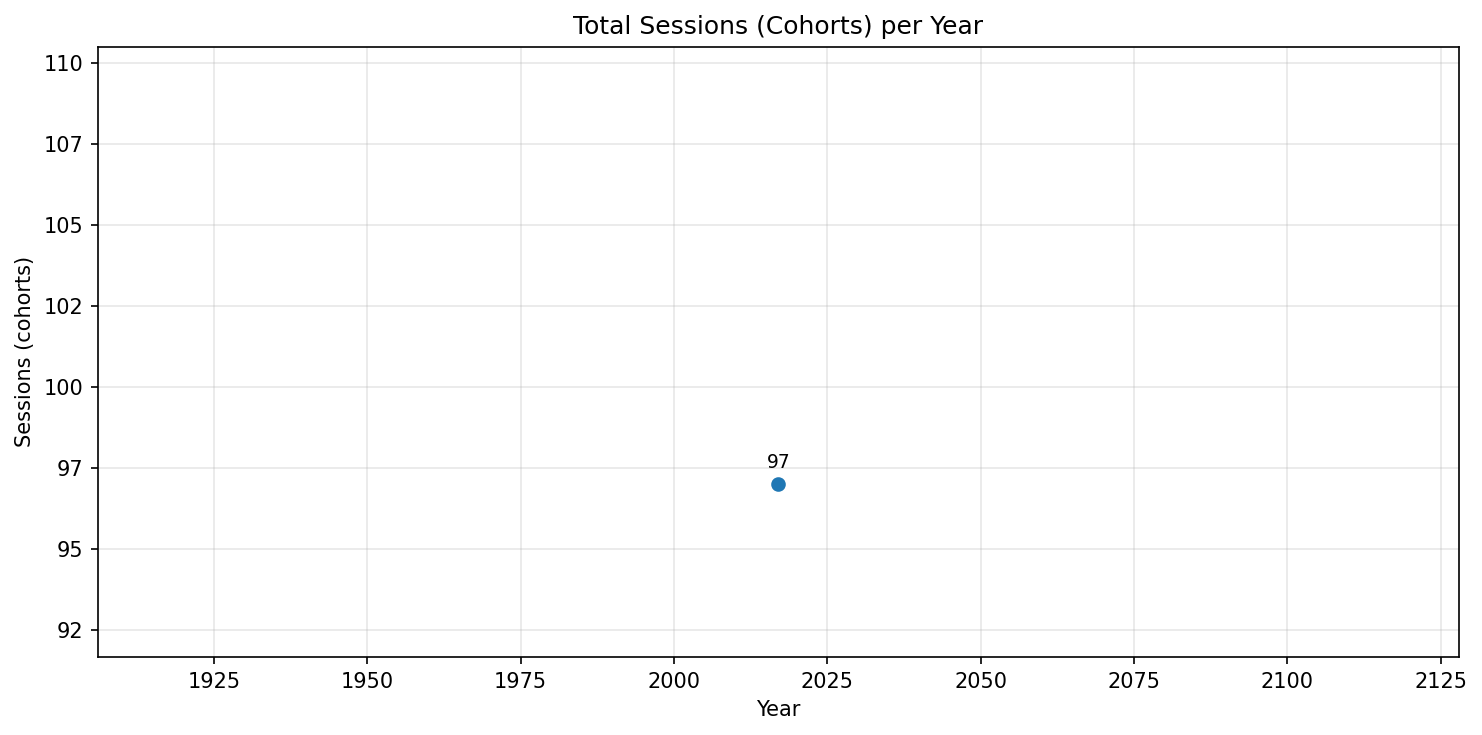

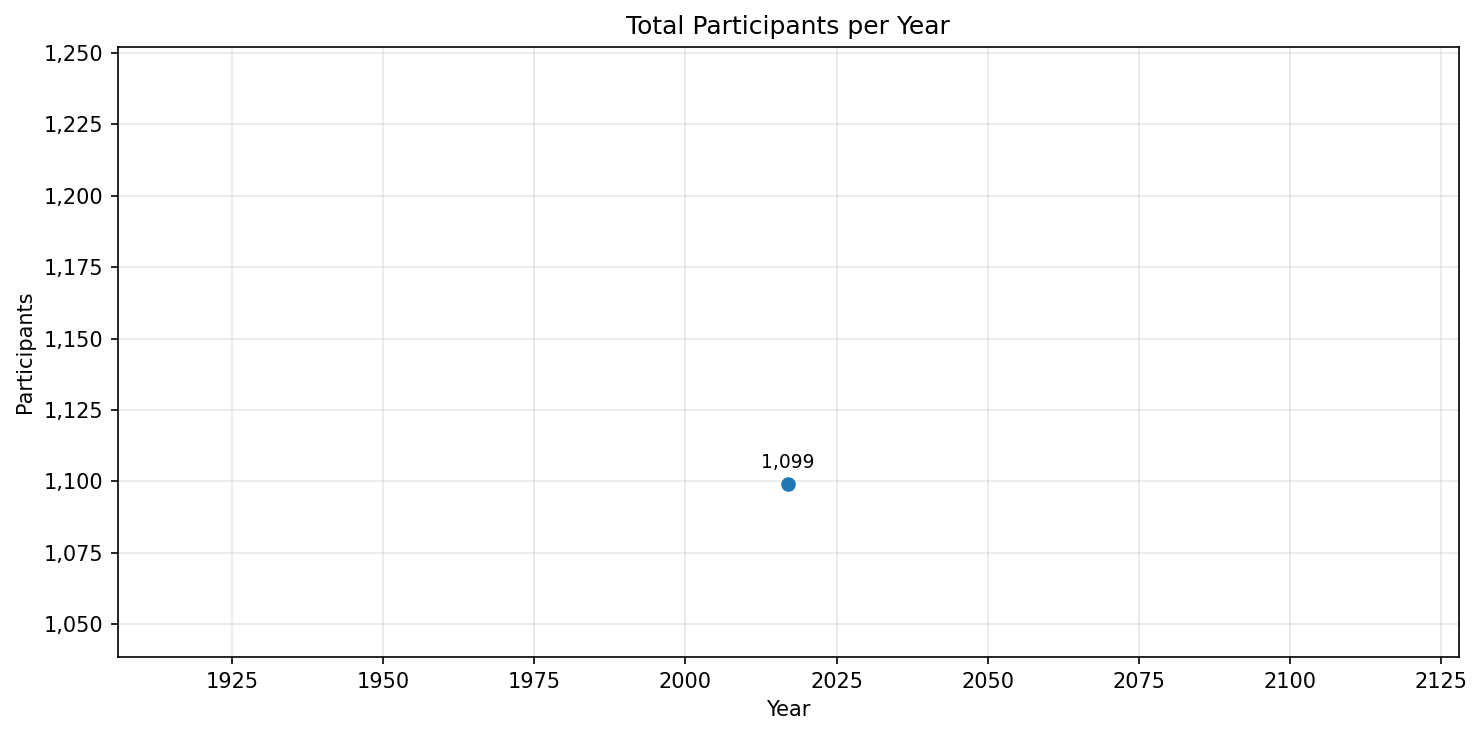

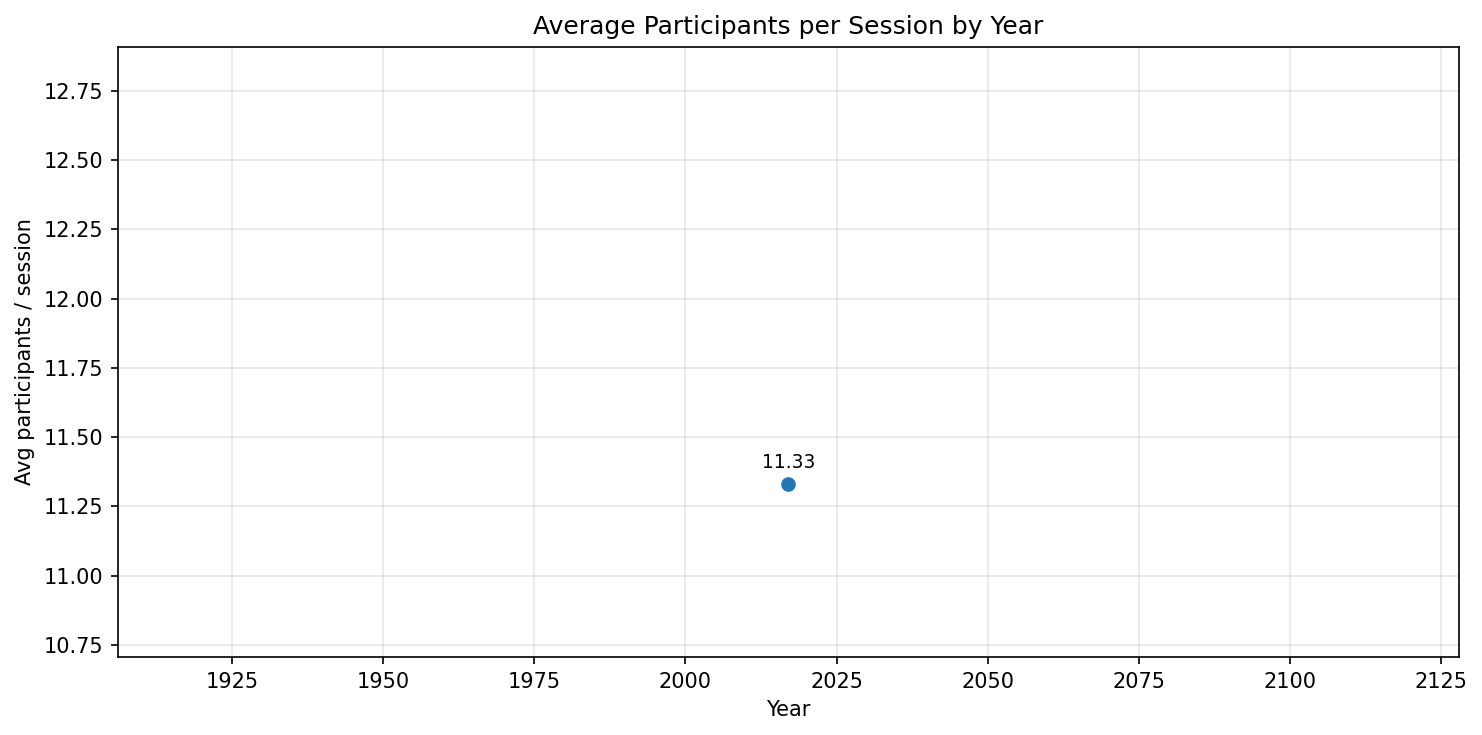

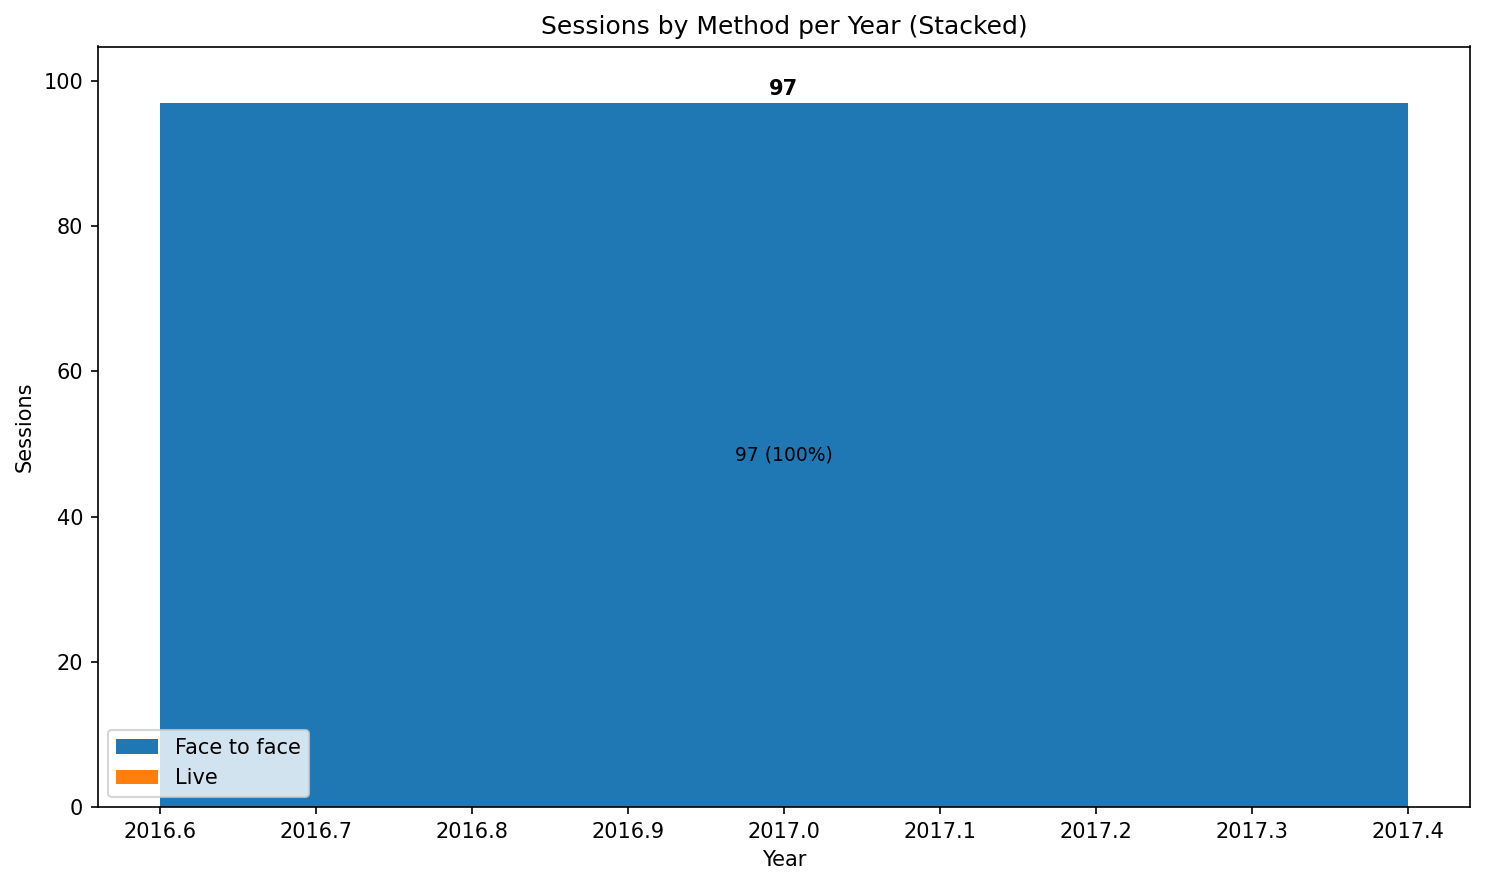

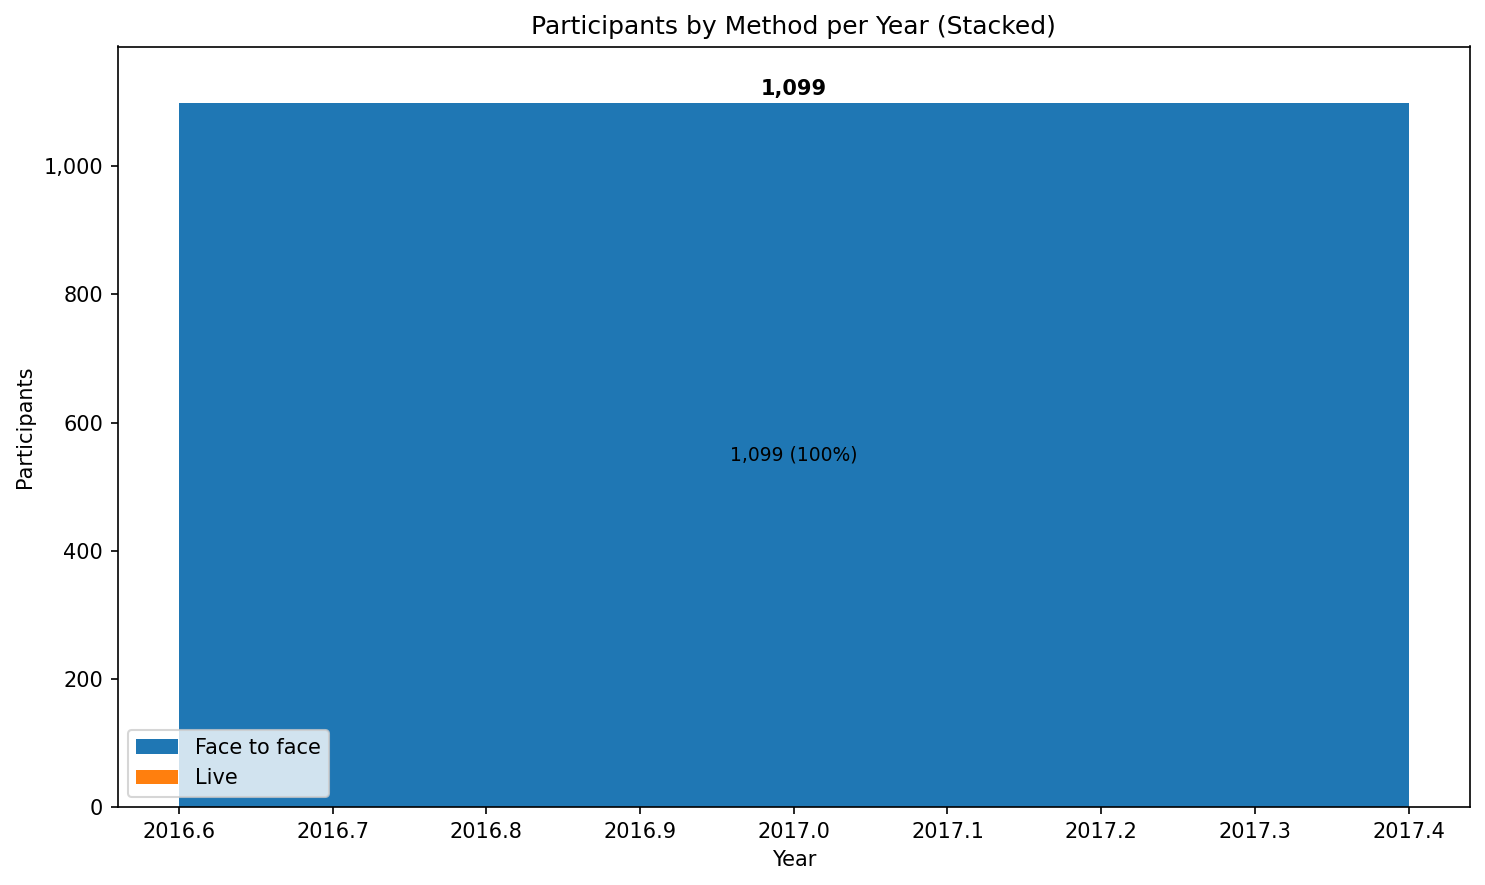

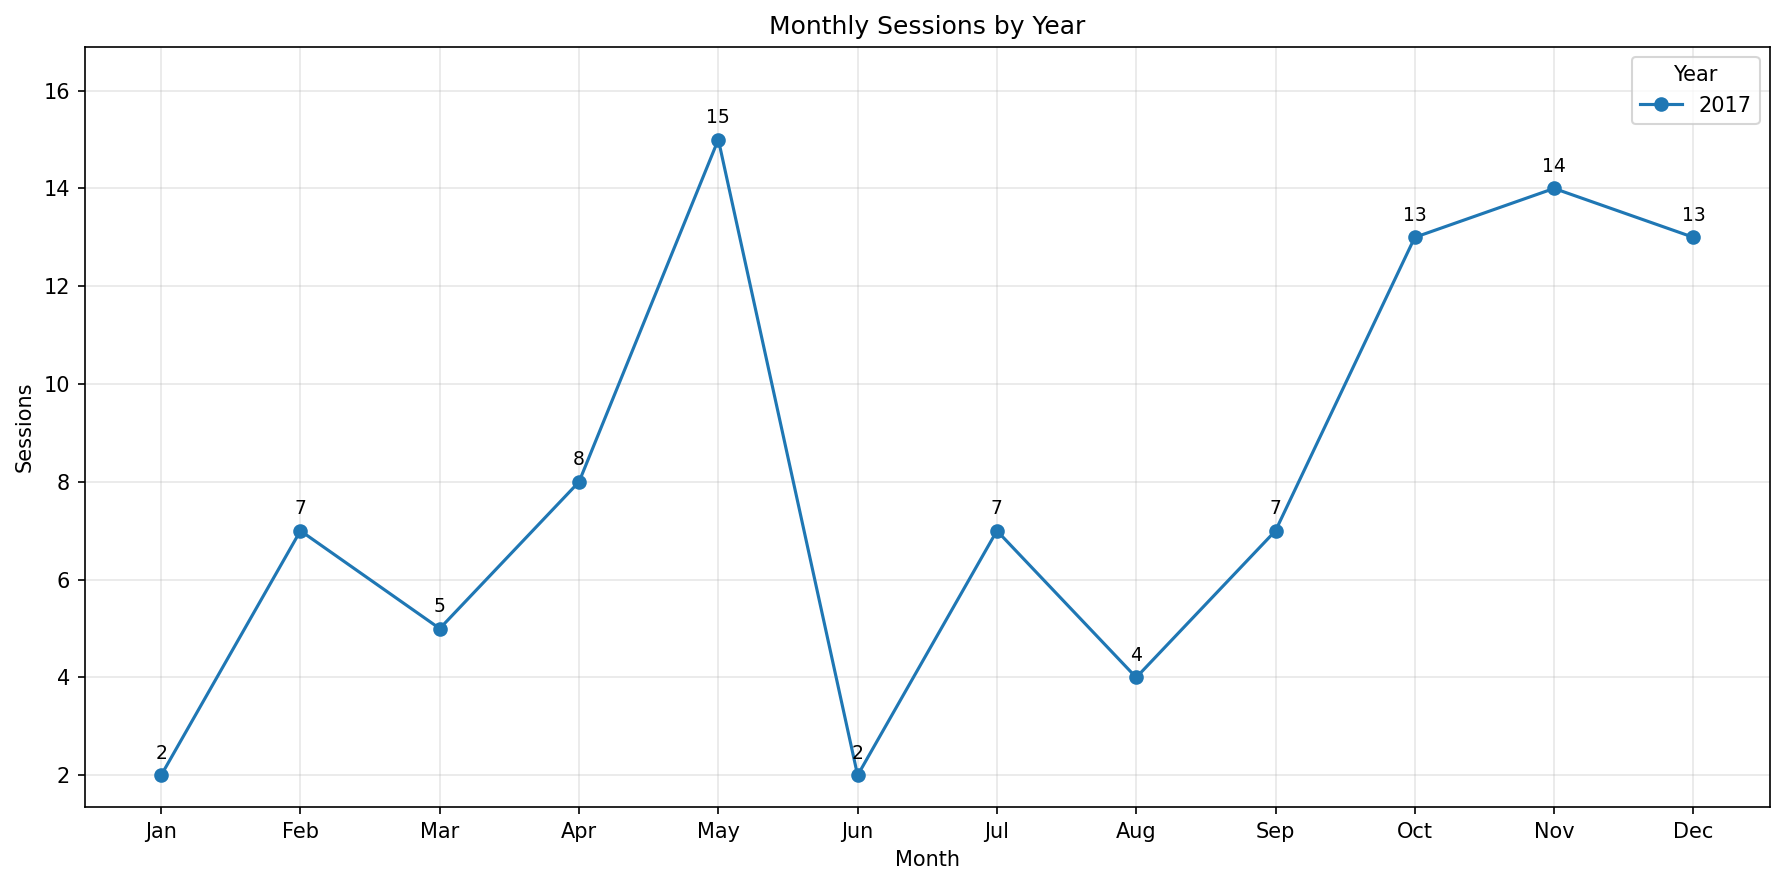

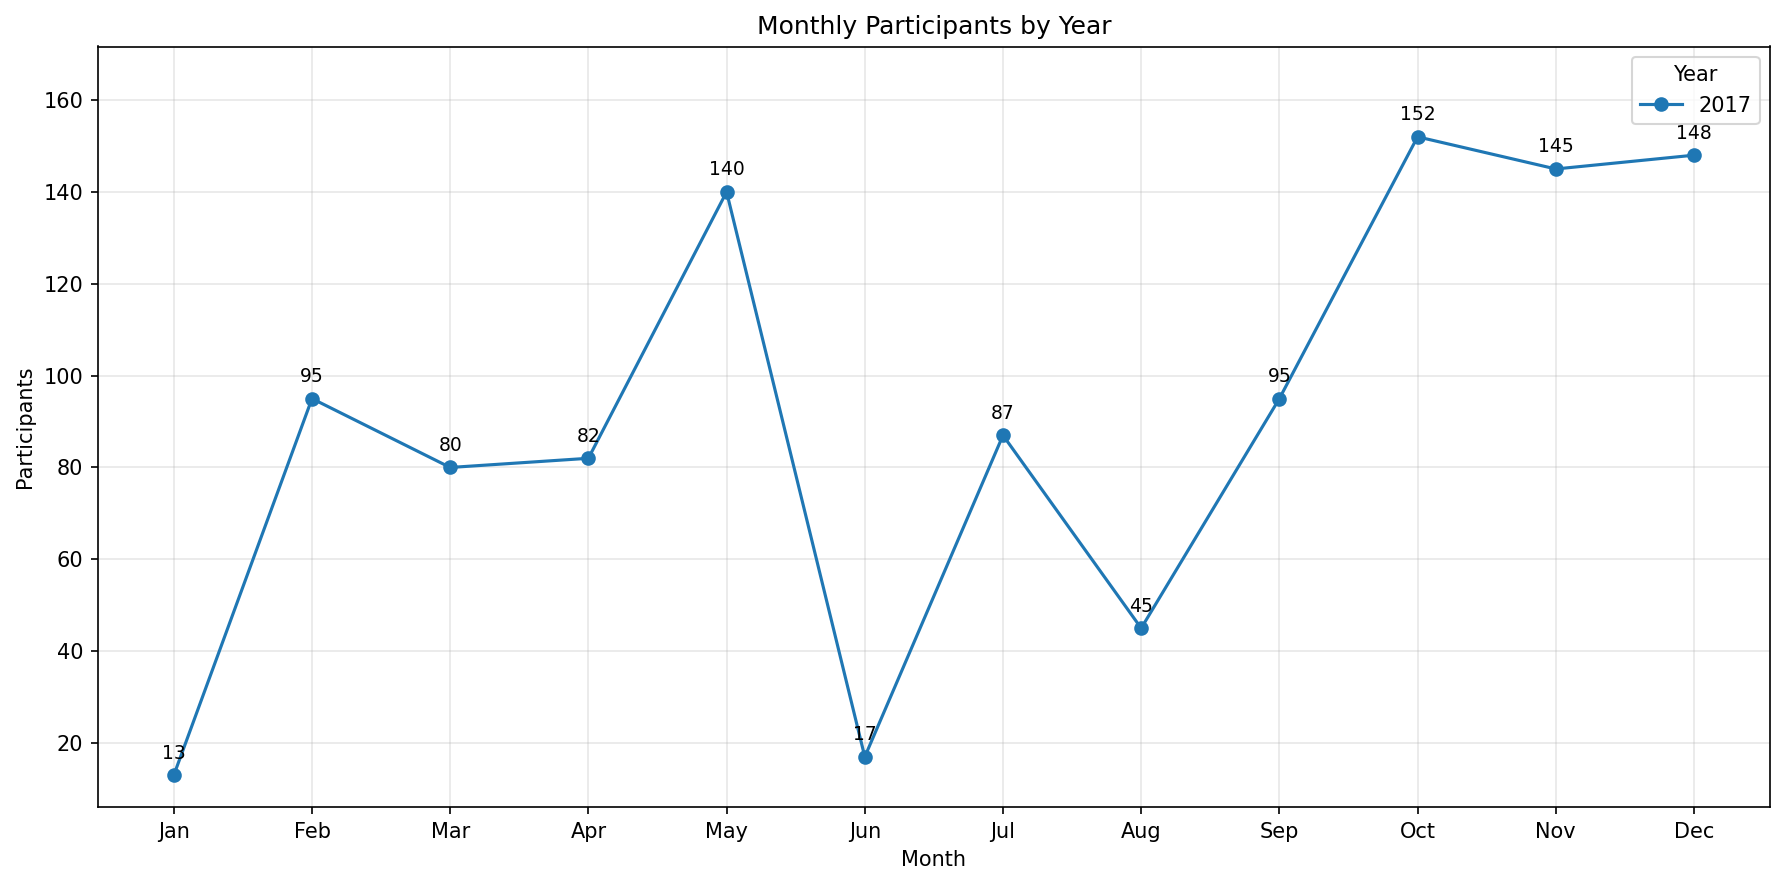

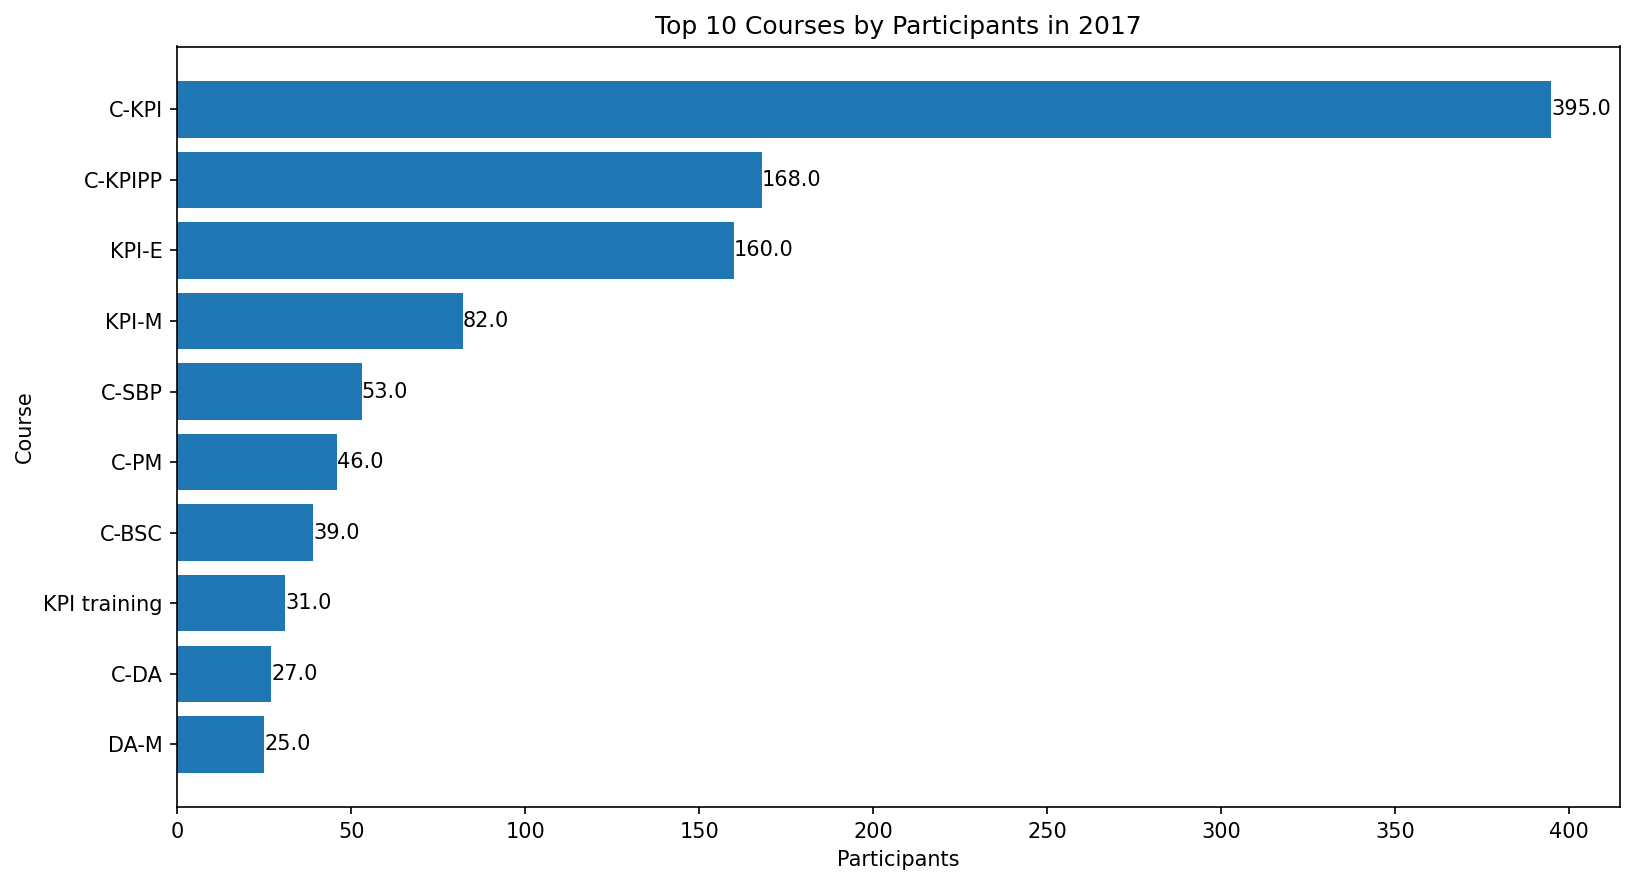

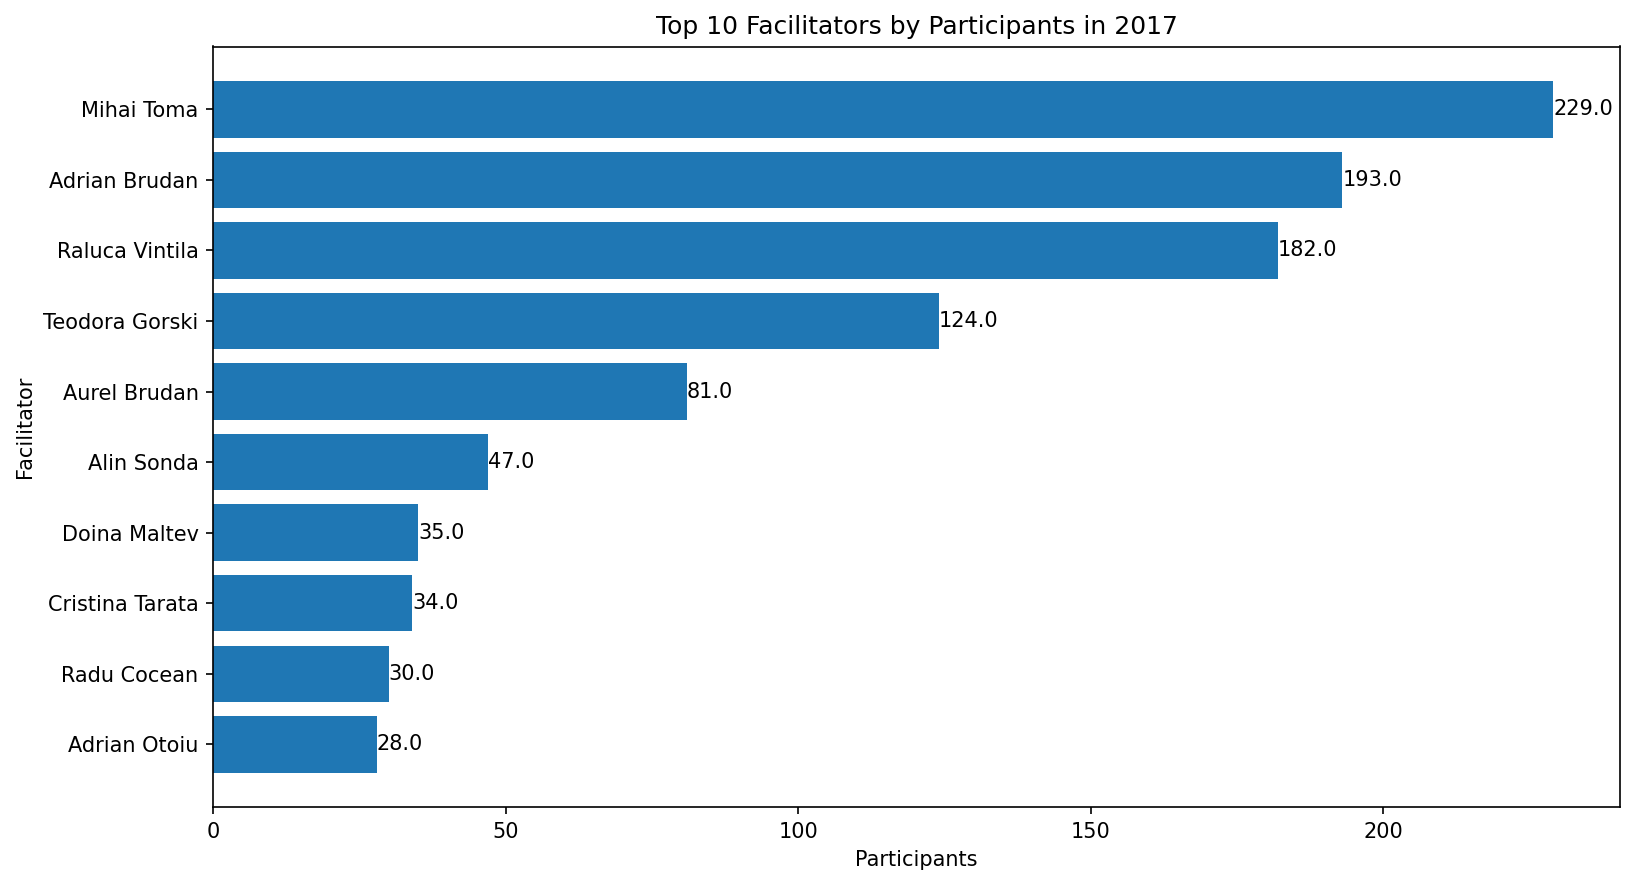

Saved figures to: /kaggle/working/figures_better


In [22]:
# Inputs:
# - Expects `course_final` DataFrame to exist.
# - Uses `Year` column if present; otherwise derives from Start/End date resolved.
# - Valid delivery methods are exactly ["Face to face", "Live"].

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from pathlib import Path
import textwrap

# -----------------------------
# Helper utilities
# -----------------------------
def fmt_thousands(x, pos=None):
    """Axis formatter with thousands separators and no decimals."""
    try:
        return f"{int(x):,}"
    except Exception:
        return str(x)

def fmt_decimal(x, decimals=2):
    """Format a float to N decimals with thousands separators."""
    if pd.isna(x):
        return ""
    return f"{x:,.{decimals}f}"

def add_headroom(ax, pct=0.05):
    """Add headroom to the upper y-limit for nicer label spacing."""
    ymin, ymax = ax.get_ylim()
    if np.isfinite(ymax):
        ax.set_ylim(ymin, ymax * (1 + pct if ymax > 0 else 1 - pct))

def label_line_points(ax, x_vals, y_vals, decimals=0):
    """Label each point on a line slightly above it."""
    for xv, yv in zip(x_vals, y_vals):
        if pd.isna(yv):
            continue
        ax.annotate(
            fmt_decimal(yv, decimals),
            xy=(xv, yv),
            xytext=(0, 6),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=9,
        )

def label_yoy_change(ax, x_vals, y_vals):
    """Annotate YoY % change next to each point (from previous point)."""
    for i in range(1, len(x_vals)):
        prev = y_vals[i - 1]
        curr = y_vals[i]
        if pd.isna(prev) or prev == 0 or pd.isna(curr):
            continue
        pct = (curr / prev - 1.0) * 100.0
        # place slightly below the point to avoid clashing with the value label
        ax.annotate(
            f"{pct:+.1f}%",
            xy=(x_vals[i], y_vals[i]),
            xytext=(0, -14),
            textcoords="offset points",
            ha="center",
            va="top",
            fontsize=9,
        )

def wrap_or_truncate(label, width=28, max_lines=2):
    """Wrap long labels to multiple lines; if still too long, truncate last line with ellipsis."""
    if not isinstance(label, str):
        return label
    wrapped = textwrap.wrap(label, width=width)
    if len(wrapped) <= max_lines:
        return "\n".join(wrapped)
    keep = wrapped[: max_lines - 1]
    last = wrapped[max_lines - 1]
    if len(last) > width:
        last = last[: max(0, width - 1)] + "…"
    keep.append(last)
    return "\n".join(keep)

def label_bar_values(ax):
    """Attach value labels to bars (vertical or horizontal)."""
    for container in ax.containers:
        try:
            ax.bar_label(container, fmt="{}")
        except Exception:
            pass

def label_stacked_segments_with_share(ax, stacked_df):
    """
    For stacked bars: label each segment as 'value (xx%)'.
    stacked_df: DataFrame indexed by x positions (years), columns = segments
    """
    totals = stacked_df.sum(axis=1).values
    for c_idx, container in enumerate(ax.containers):
        bars = list(container)
        for i, bar in enumerate(bars):
            height = bar.get_height()
            total = totals[i] if i < len(totals) else 0
            if total > 0 and height > 0:
                pct = height / total * 100.0
                label = f"{int(height):,} ({pct:.0f}%)"
                ax.annotate(
                    label,
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    ha="center",
                    va="center",
                    fontsize=9,
                )

def add_stacked_totals(ax, x_positions, totals):
    """Add total labels on top of stacked bars."""
    ymin, ymax = ax.get_ylim()
    y_offset = (ymax - ymin) * 0.01
    for x, t in zip(x_positions, totals):
        ax.annotate(
            f"{int(t):,}",
            xy=(x, t),
            xytext=(0, 2),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

# -----------------------------
# 0) Prepare data safely
# -----------------------------
df = course_final.copy()

# Ensure 'Year'
if "Year" not in df.columns:
    y_start = df["Start date resolved"].dt.year
    y_end = df["End date resolved"].dt.year
    df["Year"] = y_start.where(y_start.notna(), y_end).astype("Int64")

# Standardize 'Course Name' (if not already created)
if "Course Name" not in df.columns:
    if "acronym_map" in globals() and isinstance(acronym_map, dict):
        df["Course Name"] = (
            df["Course title"].astype(str).str.strip().map(acronym_map)
            .fillna(df["Course title"].astype(str).str.strip())
        )
    else:
        df["Course Name"] = df["Course title"].astype(str).str.strip()

# Keep only valid methods
valid_methods = ["Face to face", "Live"]
df = df[df["Method"].isin(valid_methods)].copy()

# Drop rows without a year
df = df.dropna(subset=["Year"]).copy()

# Numeric participants
df["Participants count"] = pd.to_numeric(df["Participants count"], errors="coerce").fillna(0)

# Month per row (prefer Start date resolved; else End date resolved)
date_src = df["Start date resolved"].where(df["Start date resolved"].notna(), df["End date resolved"])
df["Month"] = pd.to_datetime(date_src).dt.to_period("M").astype(str)  # "YYYY-MM"
df["Month_Num"] = pd.to_datetime(date_src).dt.month                   # 1..12

# Sorted years
years = sorted(int(y) for y in df["Year"].dropna().unique())

# Output folder
fig_dir = Path("figures_better")
fig_dir.mkdir(exist_ok=True)

# Common number formatter on axes
thousands_formatter = FuncFormatter(fmt_thousands)

# -----------------------------
# (A) All-year trend charts (with labels + YoY)
# -----------------------------
yearly_sessions = df.groupby("Year").size().astype(int)
yearly_participants = df.groupby("Year")["Participants count"].sum().astype(int)
yearly_avg_pps = (yearly_participants / yearly_sessions).replace([np.inf, -np.inf], np.nan)

# 1) Sessions per year
x_years = yearly_sessions.index.astype(int).tolist()
y_vals = yearly_sessions.values.astype(float).tolist()
plt.figure(figsize=(10, 5), dpi=150)
ax = plt.gca()
ax.plot(x_years, y_vals, marker="o")
ax.set_title("Total Sessions (Cohorts) per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Sessions (cohorts)")
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(thousands_formatter)
label_line_points(ax, x_years, y_vals, decimals=0)
label_yoy_change(ax, x_years, y_vals)
add_headroom(ax, pct=0.08)
plt.tight_layout()
plt.savefig(fig_dir / "all_years_sessions.png")
plt.show()

# 2) Participants per year
x_years = yearly_participants.index.astype(int).tolist()
y_vals = yearly_participants.values.astype(float).tolist()
plt.figure(figsize=(10, 5), dpi=150)
ax = plt.gca()
ax.plot(x_years, y_vals, marker="o")
ax.set_title("Total Participants per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Participants")
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(thousands_formatter)
label_line_points(ax, x_years, y_vals, decimals=0)
label_yoy_change(ax, x_years, y_vals)
add_headroom(ax, pct=0.08)
plt.tight_layout()
plt.savefig(fig_dir / "all_years_participants.png")
plt.show()

# 3) Avg participants per session
x_years = yearly_avg_pps.index.astype(int).tolist()
y_vals = yearly_avg_pps.values.astype(float).tolist()
plt.figure(figsize=(10, 5), dpi=150)
ax = plt.gca()
ax.plot(x_years, y_vals, marker="o")
ax.set_title("Average Participants per Session by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Avg participants / session")
ax.grid(True, alpha=0.3)
label_line_points(ax, x_years, y_vals, decimals=2)
label_yoy_change(ax, x_years, y_vals)
add_headroom(ax, pct=0.08)
plt.tight_layout()
plt.savefig(fig_dir / "all_years_avg_pps.png")
plt.show()

# 4) Sessions by method per year (stacked) with segment shares + total
sessions_method = (
    df.groupby(["Year", "Method"])
      .size().unstack("Method", fill_value=0)
      .reindex(index=years)
)
plt.figure(figsize=(10, 6), dpi=150)
ax = plt.gca()
bottom = np.zeros(len(sessions_method))
x_pos = np.array(sessions_method.index.astype(int))
for meth in valid_methods:
    vals = sessions_method[meth].values if meth in sessions_method.columns else np.zeros(len(sessions_method))
    ax.bar(x_pos, vals, bottom=bottom, label=meth)
    bottom = bottom + vals
ax.set_title("Sessions by Method per Year (Stacked)")
ax.set_xlabel("Year")
ax.set_ylabel("Sessions")
ax.yaxis.set_major_formatter(thousands_formatter)
ax.legend()
label_stacked_segments_with_share(ax, sessions_method)
add_stacked_totals(ax, x_pos, sessions_method.sum(axis=1).values)
add_headroom(ax, pct=0.08)
plt.tight_layout()
plt.savefig(fig_dir / "all_years_sessions_by_method.png")
plt.show()

# 5) Participants by method per year (stacked) with segment shares + total
participants_method = (
    df.groupby(["Year", "Method"])["Participants count"]
      .sum().unstack("Method", fill_value=0)
      .reindex(index=years)
)
plt.figure(figsize=(10, 6), dpi=150)
ax = plt.gca()
bottom = np.zeros(len(participants_method))
x_pos = np.array(participants_method.index.astype(int))
for meth in valid_methods:
    vals = participants_method[meth].values if meth in participants_method.columns else np.zeros(len(participants_method))
    ax.bar(x_pos, vals, bottom=bottom, label=meth)
    bottom = bottom + vals
ax.set_title("Participants by Method per Year (Stacked)")
ax.set_xlabel("Year")
ax.set_ylabel("Participants")
ax.yaxis.set_major_formatter(thousands_formatter)
ax.legend()
label_stacked_segments_with_share(ax, participants_method)
add_stacked_totals(ax, x_pos, participants_method.sum(axis=1).values)
add_headroom(ax, pct=0.08)
plt.tight_layout()
plt.savefig(fig_dir / "all_years_participants_by_method.png")
plt.show()

# -----------------------------
# (B) NEW: Combined monthly charts (one figure each) — multiple years as separate lines
# -----------------------------
# Sessions per month across years (lines by year)
monthly_sessions_by_year = (
    df.groupby(["Year", "Month_Num"])
      .size()
      .rename("Sessions")
      .reset_index()
)

# Ensure all months 1..12 exist per year (fill missing with 0)
all_months = pd.DataFrame({"Month_Num": np.arange(1, 13, dtype=int)})
lines_sessions = {}
for y in years:
    temp = monthly_sessions_by_year[monthly_sessions_by_year["Year"] == y][["Month_Num", "Sessions"]]
    temp = all_months.merge(temp, on="Month_Num", how="left").fillna(0)
    lines_sessions[y] = temp["Sessions"].astype(float).tolist()

plt.figure(figsize=(12, 6), dpi=150)
ax = plt.gca()
months_xticks = np.arange(1, 13, dtype=int)
for y in years:
    ax.plot(months_xticks, lines_sessions[y], marker="o", label=str(y))
# Labels on points for the last year only (to reduce clutter) or label all years if desired:
# for y in years:
#     label_line_points(ax, months_xticks, lines_sessions[y], decimals=0)
# Here: label the latest year prominently
if len(years) > 0:
    latest = years[-1]
    label_line_points(ax, months_xticks, lines_sessions[latest], decimals=0)

ax.set_title("Monthly Sessions by Year")
ax.set_xlabel("Month")
ax.set_ylabel("Sessions")
ax.set_xticks(months_xticks)
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
ax.yaxis.set_major_formatter(thousands_formatter)
ax.grid(True, alpha=0.3)
ax.legend(title="Year", ncol=min(len(years), 6))
add_headroom(ax, pct=0.08)
plt.tight_layout()
plt.savefig(fig_dir / "combined_monthly_sessions_by_year.png")
plt.show()

# Participants per month across years (lines by year)
monthly_participants_by_year = (
    df.groupby(["Year", "Month_Num"])["Participants count"]
      .sum()
      .rename("Participants")
      .reset_index()
)

lines_participants = {}
for y in years:
    temp = monthly_participants_by_year[monthly_participants_by_year["Year"] == y][["Month_Num", "Participants"]]
    temp = all_months.merge(temp, on="Month_Num", how="left").fillna(0)
    lines_participants[y] = temp["Participants"].astype(float).tolist()

plt.figure(figsize=(12, 6), dpi=150)
ax = plt.gca()
for y in years:
    ax.plot(months_xticks, lines_participants[y], marker="o", label=str(y))
# Label only the latest year's points to avoid clutter
if len(years) > 0:
    latest = years[-1]
    label_line_points(ax, months_xticks, lines_participants[latest], decimals=0)

ax.set_title("Monthly Participants by Year")
ax.set_xlabel("Month")
ax.set_ylabel("Participants")
ax.set_xticks(months_xticks)
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
ax.yaxis.set_major_formatter(thousands_formatter)
ax.grid(True, alpha=0.3)
ax.legend(title="Year", ncol=min(len(years), 6))
add_headroom(ax, pct=0.08)
plt.tight_layout()
plt.savefig(fig_dir / "combined_monthly_participants_by_year.png")
plt.show()

# -----------------------------
# (C) Per-year TOPS (kept as before)
# -----------------------------
for y in years:
    df_y = df[df["Year"] == y].copy()

    # Top 10 courses by participants (horizontal bars + wrapped names + labels)
    top_courses = (
        df_y.groupby("Course Name")["Participants count"]
            .sum().sort_values(ascending=False).head(10)
    )
    labels_wrapped = [wrap_or_truncate(s) for s in top_courses.index[::-1]]
    plt.figure(figsize=(11, 6), dpi=150)
    ax = plt.gca()
    ax.barh(labels_wrapped, top_courses.values[::-1])
    ax.set_title(f"Top 10 Courses by Participants in {y}")
    ax.set_xlabel("Participants")
    ax.set_ylabel("Course")
    ax.xaxis.set_major_formatter(thousands_formatter)
    label_bar_values(ax)
    plt.tight_layout()
    plt.savefig(fig_dir / f"{y}_top10_courses_participants.png")
    plt.show()

    # Top 10 facilitators by participants (horizontal bars + wrapped names + labels)
    top_fac = (
        df_y.groupby("Facilitator")["Participants count"]
            .sum().sort_values(ascending=False).head(10)
    )
    labels_wrapped = [wrap_or_truncate(s) for s in top_fac.index[::-1]]
    plt.figure(figsize=(11, 6), dpi=150)
    ax = plt.gca()
    ax.barh(labels_wrapped, top_fac.values[::-1])
    ax.set_title(f"Top 10 Facilitators by Participants in {y}")
    ax.set_xlabel("Participants")
    ax.set_ylabel("Facilitator")
    ax.xaxis.set_major_formatter(thousands_formatter)
    label_bar_values(ax)
    plt.tight_layout()
    plt.savefig(fig_dir / f"{y}_top10_facilitators_participants.png")
    plt.show()

print(f"Saved figures to: {fig_dir.resolve()}")